# Analyse reindexation from ABES - April 2023

# Set project

### Packages

In [1]:
# Import librairies
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings



from utils_metrics import *
from utils_visualization import *

2023-06-12 12:37:05.538157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package words to /home/aurelie/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aurelie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/aurelie/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Suppression des FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Graphical parameters

In [3]:
# Parametres graphiques
%matplotlib inline
rcParams = {
    'font.size': 14,
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.max_open_warning': 30}

sns.set(rc=rcParams)
sns.set_style(
    "whitegrid", {
        'axes.edgecolor': 'k',
        'axes.linewidth': 1,
        'axes.grid': True,
        'xtick.major.width': 1,
        'ytick.major.width': 1
        })

sns.set_context(
    "notebook",
    font_scale=1.1,
    rc={"lines.linewidth": 1.5})

pd.set_option('display.max_columns', None)

### Paths

In [4]:
# Set paths
path = "."
os.chdir(path)
data_path = path + "/data"
data_path_reindex = "/home/aurelie/ABES/labo-indexation-ai/data/reindexation/correction_juin2023"
data_path_embed = "/home/aurelie/ABES/labo-indexation-ai/data/embeddings"
output_path = path + "/outputs"
fig_path = path + "/figs"

In [5]:
# Include embeddings
include_embedding = True

# Import data

In [12]:
# Original dataset
reindex = "fusion_fichiers_reindexation.xlsx"
rameau_file = "./extraction/liste_concepts_rameau_sans_vedetteConstruites.csv"
embedding = "embeddings_results.csv"

### Check reindexation files

In [45]:
# list files
file_list = os.listdir(data_path_reindex)
file_list

['100 NOTICES A INDEXER_AFE.xlsx',
 '100 NOTICES A INDEXER-MCR.xlsx',
 '100 NOTICES A INDEXER - JMF.xlsx',
 '100 NOTICES A INDEXER_LPL.xlsx',
 '100 NOTICES A INDEXER.xlsx',
 '100 NOTICES A INDEXER-LJZ.xlsx',
 '100 NOTICES A INDEXER_MPD.xlsx',
 'fusion_fichiers_reindexation.xlsx']

In [56]:
index_file_list = [
    '100 NOTICES A INDEXER-MCR.xlsx',
    '100 NOTICES A INDEXER - JMF.xlsx',
    '100 NOTICES A INDEXER_LPL.xlsx',
    '100 NOTICES A INDEXER-LJZ.xlsx',
    '100 NOTICES A INDEXER_MPD.xlsx']

In [55]:
def import_indexation(file):
    df = pd.read_excel(
        os.path.join(data_path_reindex, file), 
        sheet_name="Notices à indexer", 
        engine="openpyxl", 
        converters={"PPN": lambda x: str(x)})
    df["PPN"] = df["PPN"].astype(str)
    
    return df
    

In [57]:
df = import_indexation('100 NOTICES A INDEXER_AFE.xlsx')
ppn_to_check = []
for file in index_file_list:
    print("Dealing with file :", file)
    ind = import_indexation(file)
    check = []

    for ppn in ind["PPN"].astype(str):
        if any(df["PPN"] == ppn):
            #print("PPN matché à la ligne :", df.loc[df["PPN"] == ppn].index)
            check.append(True)
        else: 
            print("Pas de correspondance pour PPN ", ppn)
            check.append(False)
            ppn_to_check.append(ppn)

    print("Verification que tous les PPN matchent: ", all(check))

Dealing with file : 100 NOTICES A INDEXER-MCR.xlsx
Verification que tous les PPN matchent:  True
Dealing with file : 100 NOTICES A INDEXER - JMF.xlsx
Verification que tous les PPN matchent:  True
Dealing with file : 100 NOTICES A INDEXER_LPL.xlsx
Verification que tous les PPN matchent:  True
Dealing with file : 100 NOTICES A INDEXER-LJZ.xlsx
Pas de correspondance pour PPN  77880560
Verification que tous les PPN matchent:  False
Dealing with file : 100 NOTICES A INDEXER_MPD.xlsx
Verification que tous les PPN matchent:  True


In [58]:
df.shape

(101, 6)

In [ ]:
# Merge with already merged file for concept correction
df = df.merge(os.path.join(data_path_reindex, reindex), on="PPN")

## Check files

In [40]:
# Import rameau list
ram = pd.read_csv(os.path.join(data_path, rameau_file), encoding="latin-1")
print("Nombre de notices différentes: ", ram.shape[0])
ram.head(10)

Nombre de notices différentes:  85876


PPN                                        NOM
0  157992527                                     Kirp?n
1  110140494                        Militaires artistes
2  028492161                         Militaires romains
3  028521757                       Militaires prussiens
4  029895561                                 Sa-skya-pa
5  031875459                     Militaires réunionnais
6  032370083  Construction à l'épreuve de la sécheresse
7  032878117                      Missionnaires suisses
8  034423982                       Militaires ivoiriens
9  034686940                            Outils à métaux

In [37]:
# Import reindexation file
df = pd.read_excel(os.path.join(data_path_reindex, reindex), index_col=0)
df["PPN"] = df["PPN"].astype(str)
print("Dimension of the dataset: ", df.shape)
df

Dimension of the dataset:  (112, 16)


N°ordre        PPN                                              TITRE   
0       79.0  000308838  Les sommets de l'État : essai sur l'élite du p...  \
1       58.0  003632806  Les intellectuels sous la Ve République : 1958...   
2       59.0  047450037                                Bouddha, bouddhisme   
3       65.0  058296182                         L'homme devant l'incertain   
4       80.0  059911174  Imperator Caesar Augustus : recherches sur le ...   
..       ...        ...                                                ...   
107      NaN  076503909                                                NaN   
108      NaN  076986152                                                NaN   
109      NaN  077463560                                                NaN   
110      NaN  077880560                                                NaN   
111      NaN  086077368                                                NaN   

                                                RESUME   
0    Du XIXe siècle à nos jours, l'État "fort" à la...  \
1    Célèbres, influents, on les voit, on en parle ...   
2    La 4e de couv. indique : "Ce petit livre répon...   
3    La quatrième de couverture indique : "Réintrod...   
4    Ce dossier comporte quatre volumes qui aborden...   
..                                                 ...   
107                                                NaN   
108                                                NaN   
109                                                NaN   
110                                                NaN   
111                                                NaN   

                                         INDEX_UNI_AFE   
0    606$3027223345$aClasses dirigeantes$3027226794...  \
1    606$3027235149$aIntellectuels$3027284948$yFran...   
2                           606$3027321835$aBouddhisme   
3              606$302736576X$aPhilosophie et sciences   
4    606$3027873757$aCulte impérial$302724301X$yRom...   
..                                                 ...   
107                                                NaN   
108                                                NaN   
109                                                NaN   
110                                                NaN   
111                                                NaN   

                                             INDEX_AFE   
0    Classes dirigeantes -- France -- Histoire;;Pou...  \
1    Intellectuels -- France -- 1958-.... (5e Répub...   
2                                           Bouddhisme   
3                              Philosophie et sciences   
4    Culte impérial -- Rome (Italie);;Empereurs -- ...   
..                                                 ...   
107                                                NaN   
108                                                NaN   
109                                                NaN   
110                                                NaN   
111                                                NaN   

                                         INDEX_UNI_MCR   
0    606 $3027365581$aPouvoir (sciences sociales)$3...  \
1    606 $3027235149$aIntellectuels$3027226794$yFra...   
2                          606 $3027321835$aBouddhisme   
3            606 $3027248283$aPhilosophie des sciences   
4    606 $3027234312$aImpérialisme$3027365581$xPouv...   
..                                                 ...   
107                                                NaN   
108                                                NaN   
109                                                NaN   
110                                                NaN   
111                                                NaN   

                                             INDEX_MCR   
0    Pouvoir (sciences sociales) -- Classes dirigea...  \
1                      Intellectuels -- France -- 1945   
2                                           Bouddhisme   
3                             Philosophie des sc

In [11]:
# Embeddings
emb = pd.read_csv(os.path.join(data_path_embed, embedding), index_col=0)
emb["PPN"] = emb["PPN"].astype(str)
emb["embedding_chains"] = emb["embedding_chains"].apply(lambda x: eval(x))
emb["embeddings_autorites"] = emb["embeddings_autorites"].apply(lambda x: eval(x))
print("Dimension of the dataset: ", emb.shape)
emb.head()

Dimension of the dataset:  (100, 3)


PPN                                   embedding_chains   
0  000308838  [État, Administration publique, Fédéralisme, F...  \
1  00094758X  [Dollar américain, Système monétaire internati...   
2  003632806  [Intellectuels -- Activité politique, Intellec...   
3  047450037  [Bouddhisme -- Anthologies, Bouddhisme -- Livr...   
4  05224170X  [Apprentissage par problèmes, Psychologie de l...   

                                embeddings_autorites  
0  [État, Administration publique, Fédéralisme, F...  
1  [Dollar américain, Système monétaire internati...  
2  [Intellectuels, Activité politique, Intellectu...  
3  [Bouddhisme, Anthologies, Bouddhisme, Livres s...  
4  [Apprentissage par problèmes, Psychologie de l...

In [12]:
type(emb.loc[3,"embeddings_autorites"])

list

In [13]:
# Check import for one file
file = '100 NOTICES A INDEXER.xlsx'
ind = pd.read_excel(
    os.path.join(data_path_reindex, file), 
    sheet_name="Notices à indexer", 
    engine="openpyxl", 
    converters={"PPN": lambda x: str(x)})
ind.head(3)

N°ordre       PPN                                              TITRE   
0       79    308838  Les sommets de l'État : essai sur l'élite du p...  \
1       58   3632806  Les intellectuels sous la Ve République : 1958...   
2       59  47450037                                Bouddha, bouddhisme   

                                              RESUME INDEXATION UNIMARC   
0  Du XIXe siècle à nos jours, l'Etat "fort" à la...                NaN  \
1  Célèbres, influents, on les voit, on en parle ...                NaN   
2  La 4e de couv. indique : "Ce petit livre répon...                NaN   

  INDEXATION AFFICHAGE PUBLIC  
0                         NaN  
1                         NaN  
2                         NaN

In [14]:
file = '100 NOTICES A INDEXER_AFE.xlsx'
ind = pd.read_excel(
    os.path.join(data_path_reindex, file), 
    sheet_name="Notices à indexer", 
    skiprows=lambda x: x == 1, 
    engine="openpyxl", 
    converters={"PPN": lambda x: str(x)})
ind.drop(ind[ind["PPN"].isna()].index, inplace=True) # delete first line corresponding to example
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('\\n$', '', x))
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('^\\n', '', x))
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].replace("\\n", ';', regex=True)
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub(';*$', '', x))
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('^;*', '', x))
ind.head(3)

N°ordre       PPN                                              TITRE   
0       58   3632806  Les intellectuels sous la Ve République : 1958...  \
1       59  47450037                                Bouddha, bouddhisme   
2       65  58296182                         L'homme devant l'incertain   

                                              RESUME   
0  Célèbres, influents, on les voit, on en parle ...  \
1  La 4e de couv. indique : "Ce petit livre répon...   
2  La quatrième de couverture indique : "Réintrod...   

                                  INDEXATION UNIMARC   
0  606$3027235149$aIntellectuels$3027284948$yFran...  \
1                         606$3027321835$aBouddhisme   
2            606$302736576X$aPhilosophie et sciences   

                         INDEXATION AFFICHAGE PUBLIC  
0  Intellectuels -- France‎ -- 1958-.... (5e Répu...  
1                                         Bouddhisme  
2                            Philosophie et sciences

In [15]:
def import_indexation(file):
    df = pd.read_excel(
        os.path.join(data_path_reindex, file), 
        sheet_name="Notices à indexer", 
        engine="openpyxl", 
        converters={"PPN": lambda x: str(x)})
    df.drop(df[df["PPN"].isna()].index, inplace=True) # delete first line corresponding to example
    if "INDEXATION AFFICHAGE PUBLIC" in df.columns:
        if any(pd.isnull(df["INDEXATION AFFICHAGE PUBLIC"])):
            df.loc[pd.isnull(df["INDEXATION AFFICHAGE PUBLIC"]), "INDEXATION AFFICHAGE PUBLIC"] = ''
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('\\n*$', '', x)) 
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('^\\n*', '', x))  
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: ';;'.join(x.splitlines())) 
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].replace("\\n", '', regex=True) 
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].replace("\u200e", '', regex=True)
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("^[\s*;\s*]", '', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("[\s*;\s*]$", '', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ecologie", 'Écologie', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Education", 'Éducation', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Econo", 'Écono', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Etablissement", 'Établissement', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Evaluation", 'Évaluation', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Evolution", 'Évolution', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ecrivain", 'Écrivain', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Etude", 'Étude', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Energie", 'Énergie', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ecoterrorisme", 'Écoterrorisme', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ecole", 'École', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Etat", 'État', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Eolienne", 'Éolienne', x))    
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Equipe", 'Équipe', x))         
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Eco-anxiété", 'Éco-anxiété', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Epistémologie", 'Épistémologie', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Extémisme", 'Extrémisme', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Parimoine", 'Patrimoine', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Ralation", 'Relation', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Jusrisprudence", 'Jurisprudence', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Procéudure", 'Procédure', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("socialisme et écologie", 'Socialisme et écologie', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("Vendrée", 'Vendée', x))    
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("$", '', x))    

    df["PPN"] = df["PPN"].astype(str)
    
    return df
    

In [16]:
ppn_to_check = []
for file in index_file_list:
    print("Dealing with file :", file)
    ind = import_indexation(file)
    check = []

    for ppn in ind["PPN"].astype(str):
        if any(df["PPN"] == ppn):
            #print("PPN matché à la ligne :", df.loc[df["PPN"] == ppn].index)
            check.append(True)
        else: 
            print("Pas de correspondance pour PPN ", ppn)
            check.append(False)
            ppn_to_check.append(ppn)

    print("Verification que tous les PPN matchent: ", all(check))

Dealing with file : 100 NOTICES A INDEXER_AFE.xlsx
Pas de correspondance pour PPN  308838
Pas de correspondance pour PPN  3632806
Pas de correspondance pour PPN  47450037
Pas de correspondance pour PPN  58296182
Pas de correspondance pour PPN  59911174
Pas de correspondance pour PPN  67313493
Pas de correspondance pour PPN  70072973
Pas de correspondance pour PPN  76503909
Pas de correspondance pour PPN  76986152
Pas de correspondance pour PPN  77463560
Pas de correspondance pour PPN  77880560
Pas de correspondance pour PPN  86077368
Verification que tous les PPN matchent:  False
Dealing with file : 100 NOTICES A INDEXER-MCR.xlsx
Pas de correspondance pour PPN  308838
Pas de correspondance pour PPN  3632806
Pas de correspondance pour PPN  47450037
Pas de correspondance pour PPN  58296182
Pas de correspondance pour PPN  59911174
Pas de correspondance pour PPN  67313493
Pas de correspondance pour PPN  70072973
Pas de correspondance pour PPN  76503909
Pas de correspondance pour PPN  76986

In [17]:
ppn_to_correct = list(set(ppn_to_check))
ppn_to_correct

['76986152',
 '58296182',
 '59911174',
 '77880560',
 '86077368',
 '77463560',
 '67313493',
 '47450037',
 '3632806',
 '70072973',
 '76503909',
 '308838']

## Merge files (par les titres)

In [18]:
cols_to_merge = ["RESUME", "INDEXATION AFFICHAGE PUBLIC"]

In [19]:
def merge_new_indexation(file1, file2, columns, on="RESUME", how="inner"):
    if isinstance(file1, pd.DataFrame):
        df1 = file1
    else: 
        df1 = import_indexation(file1)
    if isinstance(file2, pd.DataFrame):
        df2 = file2
    else: 
        df2 = import_indexation(file2)
    df_merge = pd.merge(df1, df2[columns], on=on, how=how)
    return df_merge

In [20]:
# Check notices extraction 
index_file = '100 NOTICES A INDEXER.xlsx'
df1 = merge_new_indexation(df, index_file, columns=["PPN", "TITRE", "RESUME", "INDEXATION AFFICHAGE PUBLIC"])
print("Dimension after merge: ", df1.shape)
print("Adequation parfaite entre les titres : ", all(df1["TITRE_x"] == df1["TITRE_y"]))

Dimension after merge:  (100, 12)
Adequation parfaite entre les titres :  False


In [21]:
# Check correspondance
print("Only 1 notice per PPN for x: ", all(df1.groupby("PPN_x")["TITRE_x"].count() == 1))
print("Only 1 notice per PPN for y: ", all(df1.groupby("PPN_y")["TITRE_y"].count() == 1))

Only 1 notice per PPN for x:  True
Only 1 notice per PPN for y:  False


In [22]:
# Check for y
df1.groupby("PPN_y")["TITRE_y"].count().sort_values(ascending=False)

PPN_y
237131560    2
00094758X    1
249549492    1
257936432    1
257504990    1
            ..
198384122    1
197101267    1
196122708    1
196109590    1
86077368     1
Name: TITRE_y, Length: 99, dtype: int64

In [23]:
# Check errors
df1.loc[df1["PPN_y"] == "237131560", ["PPN_x", "TITRE_x", "PPN_y", "TITRE_y"]]

PPN_x                                       TITRE_x      PPN_y   
65  237131560  Maths [concours 2020] : admissibilité, écrit  237131560  \
66  248611895  Maths : concours 2021 : admissibilité, écrit  237131560   

                                         TITRE_y  
65  Maths [concours 2020] : admissibilité, écrit  
66  Maths [concours 2020] : admissibilité, écrit

==> 2 notices corresponding to the same notice in réindexation

In [24]:
# Check errors
df.loc[df["PPN"] == "237131560", ["PPN", "TITRE", "RESUME"]]

PPN                                         TITRE   
106783  237131560  Maths [concours 2020] : admissibilité, écrit  \

                                                   RESUME  
106783  Une préparation à l'épreuve d'admissibilité de...

In [25]:
# Merge notices indexation
index_columns = []
for file in index_file_list:
    name = file[-8:-5]
    print("Dealing with :", name)
    df = merge_new_indexation(df, file, columns=cols_to_merge)
    col_name = str("INDEX_" + name)
    df.rename(columns={"INDEXATION AFFICHAGE PUBLIC": col_name}, inplace=True)
    print("Dimension after merge: ", df.shape)
    index_columns.append(col_name)


Dealing with : AFE
Dimension after merge:  (101, 10)
Dealing with : MCR
Dimension after merge:  (101, 11)
Dealing with : JMF
Dimension after merge:  (101, 12)
Dealing with : LPL
Dimension after merge:  (101, 13)
Dealing with : LJZ
Dimension after merge:  (100, 14)
Dealing with : MPD
Dimension after merge:  (100, 15)


In [26]:
if include_embedding:
    df = df.merge(emb, on="PPN", how="inner")
    print("Dimension after merge with embeddings: ", df.shape)

Dimension after merge with embeddings:  (99, 17)


In [27]:
df.fillna('nan', inplace=True)

In [28]:
# Check merging
df.head(5)

PPN                                              TITRE   
0  000308838  Les sommets de l'État : essai sur l'élite du p...  \
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   
3  047450037                                Bouddha, bouddhisme   
4  05224170X  Apprendre à aimer les mathématiques : conditio...   

                                              RESUME   
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...  \
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   
3  La 4e de couv. indique : "Ce petit livre répon...   
4  Les entretiens d'élèves et d'enseignants, anal...   

                                              RAMEAU  DEWEY   
0  Bureaucratie;Classes dirigeantes;Classes dirig...         \
1  Dollar américain;Finances internationales;Poli...    320   
2               Intellectuels;Intellectuels français    301   
3                                         Bouddhisme  294.3   
4  Mathématiques -- Étude et enseignement -- Aspe...    370   

                                               DESCR   
0  Les sommets de l'État : essai sur l'élite du p...  \
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   
3  Bouddha, bouddhisme La 4e de couv. indique : "...   
4  Apprendre à aimer les mathématiques : conditio...   

   presence_chaine_indexation   
0                       False  \
1                       False   
2                       False   
3                       False   
4                        True   

                                rameau_chaines_index   
0  [Bureaucratie, Classes dirigeantes, Classes di...  \
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   
3                                       [Bouddhisme]   
4  [Mathématiques -- Étude et enseignement -- Asp...   

                                     rameau_concepts   
0  [Bureaucratie, Classes dirigeantes, Classes di...  \
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   
3                                       [Bouddhisme]   
4  [Mathématiques, Étude et enseignement, Aspect ...   

                                           INDEX_AFE   
0  Classes dirigeantes -- France -- Histoire;;Pou...  \
1  Dollar américain;;Eurodollar, Marché de l';;Po...   
2  Intellectuels -- France -- 1958-.... (5e Répub...   
3                                         Bouddhisme   
4  Mathématiques -- Étude et enseignement;;Psycho...   

                                           INDEX_MCR   
0  Pouvoir (sciences sociales) -- Classes dirigea...  \
1  Dollar américain -- Mondialisation;;Dollar amé...   
2                    Intellectuels -- France -- 1945   
3                                         Bouddhisme   
4  Mathématiques -- Enfants en difficulté d'appre...   

                                           INDEX_JMF   
0  Classes dirigeantes -- Relations avec l'État -...  \
1  Dollar américain ;;Politique économique -- Éta...   
2  Intellectuels français -- Sociologie ;;Intelle...   
3   Philosophie bouddhique ;;Spiritualité bouddhique   
4  Didactique -- Mathématiques;;Apprentissage par...   

                                           INDEX_LPL   
0  Hauts fonctionnaires -- France;;Classes dirige...  \
1  Dollar américain -- Influence -- 20e siècle;;F...   
2  Intellectuels -- France -- 1958 (5e République...   
3  Bouddhisme -- Étude et enseignement;;Philosoph...   
4  Apprentissage -- Mathématiques;;Enseignement -...   

                                           INDEX_LJZ   
0  Classes dirigeantes -- France;;Hauts fonctionn...  \
1  Dollar américain;;Eurodollar, Marché de l';;Fi...   
2  Intellectuels -- France;;Vie intellectuelle --...   
3  Bouddhisme -- Coutumes et pratiques;;Bouddhism...   
4  Mathématiques -- Pédagogie;;Mathématiques -- É...

In [29]:
df.shape

(99, 17)

In [30]:
# Save merged file
df.to_csv(os.path.join(data_path, "data_with_reindexation_and_embeddings.csv"))

# Analyse RAMEAU concepts

In [31]:
index_columns

['INDEX_AFE', 'INDEX_MCR', 'INDEX_JMF', 'INDEX_LPL', 'INDEX_LJZ', 'INDEX_MPD']

## Number of Indexation chains

In [32]:
df["nb_chaine_index_rameau"] = df["RAMEAU"].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";")))
for col in index_columns:
    print("Dealing with ", col)
    index_name = col.split("_")[1]
    new_col_name = str("nb_chaine_index_" + index_name)
    df[new_col_name] = df[col].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";;")))

Dealing with  INDEX_AFE
Dealing with  INDEX_MCR
Dealing with  INDEX_JMF
Dealing with  INDEX_LPL
Dealing with  INDEX_LJZ
Dealing with  INDEX_MPD


In [33]:
# Count nb of chain
cols = [
    "nb_chaine_index_rameau",
    "nb_chaine_index_AFE",
    "nb_chaine_index_MCR",
    "nb_chaine_index_JMF",
    "nb_chaine_index_LPL",
    "nb_chaine_index_LJZ",
    "nb_chaine_index_MPD"]

In [34]:
subset = df[cols].melt()
subset

variable  value
0    nb_chaine_index_rameau      7
1    nb_chaine_index_rameau      3
2    nb_chaine_index_rameau      2
3    nb_chaine_index_rameau      1
4    nb_chaine_index_rameau      4
..                      ...    ...
688     nb_chaine_index_MPD      3
689     nb_chaine_index_MPD      3
690     nb_chaine_index_MPD      3
691     nb_chaine_index_MPD      1
692     nb_chaine_index_MPD      1

[693 rows x 2 columns]

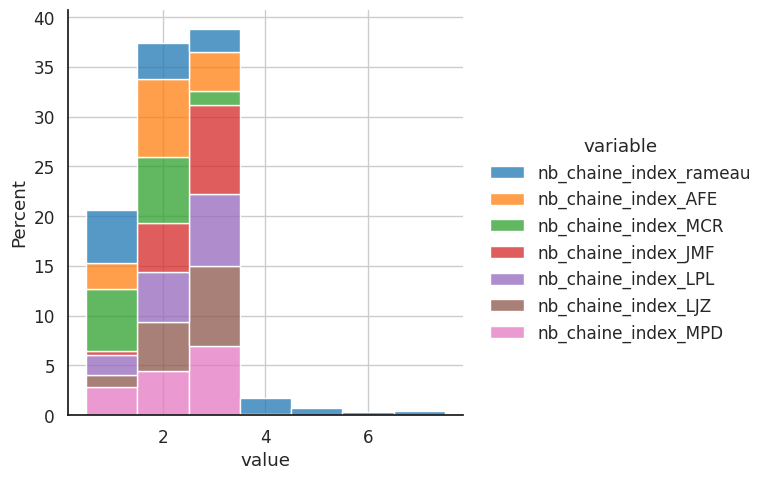

In [35]:
# Number of indexation chain
sns.displot(x="value", hue="variable", data=subset, palette="tab10", discrete=True, stat="percent", multiple="stack")

In [36]:
c = ["PPN", "TITRE", "RAMEAU"] + cols + index_columns

In [37]:
## Check for notices with more than a threshold
thres = 4
mask = df[cols] >= thres
high_nb_index_chain = df.loc[mask.sum(axis=1) >= 1, c]

In [38]:
high_nb_index_chain

PPN                                              TITRE   
0   000308838  Les sommets de l'État : essai sur l'élite du p...  \
4   05224170X  Apprendre à aimer les mathématiques : conditio...   
5   058296182                         L'homme devant l'incertain   
12  077880560  Etude du vascular endothelial growth factor (V...   
16  126056536       Tennis : soyez P.R.O. : la méthode pour oser   
22  159761875  Les sociétés coloniales à l'âge des empires : ...   
24  163093741  Le cri d'Archimède : l'art de la Découverte et...   
28  181543656  Israël entre quatre murs : la politique sécuri...   
31  183201523  L'habitat du Néolithique ancien de Colombelles...   
44  200404342  La fabrique des classiques africains : écrivai...   
55  231860838                              La justice prédictive   
66  237156989      Le photojournalisme peut-il sauver la presse    
70  248194305                                 Le travail du care   
79  255264887  Épreuves écrites du CRFPA : spécialité droit p...   
81  257349006  Vivre plus simplement : analyse sociologique d...   
82  257504990                             La nouvelle économique   
85  26117309X  Monde enchanté : chansons et imaginaires géogr...   
86  261199609  Grosse, et alors  : connaître et combattre la ...   
88  262267888  Ce que les GAFAM font aux médias africains : e...   
90  263439038  Jouer, rêver, inventer... : la créativité à l'...   
95  26753177X  Algocratie : allons-nous donner le pouvoir aux...   

                                               RAMEAU  nb_chaine_index_rameau   
0   Bureaucratie;Classes dirigeantes;Classes dirig...                       7  \
4   Mathématiques -- Étude et enseignement -- Aspe...                       4   
5   Chaos (théorie des systèmes);Incertitude;Libre...                       7   
12  Facteur de croissance des cellules endothélial...                       4   
16  Performance (sports);Tennis -- Aspect psycholo...                       4   
22  Colonies;Colonies;Colonies;Colonisation -- Asp...                       7   
24  Créativité;Créativité en sciences;Découvertes ...                       5   
28  Conflit israélo-arabe;Menaces;Relations milita...                       4   
31  Antiquités;Culture à céramique linéaire;Fouill...                       4   
44  Littérature africaine de langue française -- A...                       5   
55  Droit -- Informatique -- Aspect moral;Droit et...                       5   
66  Journalisme électronique;Photographes de press...                       4   
70  Aides-soignants -- Conditions de travail;Compo...                       5   
79  Droit pénal;Obligations (droit);Procédure péna...                       4   
81  Auto-développement (psychothérapie);Changement...                       6   
82  Cycles économiques;Planification économique;Éc...                       4   
85  Chansons -- Art d'écrire -- Géographie;Géograp...                       4   
86  Corps humain -- Aspect social;Discrimination;G...                       4   
88  Diffusion sélective de l'information;Géants du...                       6   
90  Créativité (éducation);Créativité -- Chez l'en...                       4   
95  Algorithmes;Changement social;Informatique -- ...                       5   

    nb_chaine_index_AFE  nb_chaine_index_MCR  nb_chaine_index_JMF   
0                     2                    2                    3  \
4                     3                    2                    3   
5                     1                    1                    3   
12                    2                    1                    3   
16                    2                    1                    3   
22                    2                    2                    3   
24                    3                    2                    3   
28                    3                    2                    3   
31                    3                    2                    3   
44                    3                 

## Get all concepts

In [39]:
ram

PPN                              NOM
0      157992527                           Kirp?n
1      110140494              Militaires artistes
2      028492161               Militaires romains
3      028521757             Militaires prussiens
4      029895561                       Sa-skya-pa
...          ...                              ...
85871  191405949  Relations artistes-collectivité
85872  234777605         Postcolonialisme et arts
85873  193907445                           Ascèse
85874  027415074                   Vie chrétienne
85875  140430431                 Loisirs créatifs

[85876 rows x 2 columns]

In [40]:
# Mettre à plat TOUS les mots clé
pattern = r';;\s*(?![^()$]*\))| -- |-- | --|--| - '

for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_concept_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


In [41]:
df.head(3)

PPN                                              TITRE   
0  000308838  Les sommets de l'État : essai sur l'élite du p...  \
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   

                                              RESUME   
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...  \
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   

                                              RAMEAU DEWEY   
0  Bureaucratie;Classes dirigeantes;Classes dirig...        \
1  Dollar américain;Finances internationales;Poli...   320   
2               Intellectuels;Intellectuels français   301   

                                               DESCR   
0  Les sommets de l'État : essai sur l'élite du p...  \
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   

   presence_chaine_indexation   
0                       False  \
1                       False   
2                       False   

                                rameau_chaines_index   
0  [Bureaucratie, Classes dirigeantes, Classes di...  \
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   

                                     rameau_concepts   
0  [Bureaucratie, Classes dirigeantes, Classes di...  \
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   

                                           INDEX_AFE   
0  Classes dirigeantes -- France -- Histoire;;Pou...  \
1  Dollar américain;;Eurodollar, Marché de l';;Po...   
2  Intellectuels -- France -- 1958-.... (5e Répub...   

                                           INDEX_MCR   
0  Pouvoir (sciences sociales) -- Classes dirigea...  \
1  Dollar américain -- Mondialisation;;Dollar amé...   
2                    Intellectuels -- France -- 1945   

                                           INDEX_JMF   
0  Classes dirigeantes -- Relations avec l'État -...  \
1  Dollar américain ;;Politique économique -- Éta...   
2  Intellectuels français -- Sociologie ;;Intelle...   

                                           INDEX_LPL   
0  Hauts fonctionnaires -- France;;Classes dirige...  \
1  Dollar américain -- Influence -- 20e siècle;;F...   
2  Intellectuels -- France -- 1958 (5e République...   

                                           INDEX_LJZ   
0  Classes dirigeantes -- France;;Hauts fonctionn...  \
1  Dollar américain;;Eurodollar, Marché de l';;Fi...   
2  Intellectuels -- France;;Vie intellectuelle --...   

                                           INDEX_MPD   
0  Classes dirigeantes -- France -- Histoire;;Éli...  \
1  Dollar américain;;Eurodollar, Marché de l';;Fi...   
2  Intellectuels -- France -- 1958-.... (5e Répub...   

                                    embedding_chains   
0  [État, Administration publique, Fédéralisme, F...  \
1  [Dollar américain, Système monétaire internati...   
2  [Intellectuels -- Activité politique, Intellec...   

                                embeddings_autorites  nb_chaine_index_rameau   
0  [État, Administration publique, Fédéralisme, F...                       7  \
1  [Dollar américain, Système monétaire internati...                       3   
2  [Intellectuels, Activité politique, Intellectu...                       2   

   nb_chaine_index_AFE  nb_chaine_index_MCR  nb_chaine_index_JMF   
0                    2                    2                    3  \
1                    3                    2                    3   
2                    1                    1                    2   

   nb_chaine_index_LPL  nb_chaine_index_LJZ  nb_chaine_index_MPD   
0                    3                    3                    3  \
1                    3                    3                    3   
2                    2                    2                    1   

                

## Format data

In [42]:
df.columns

Index(['PPN', 'TITRE', 'RESUME', 'RAMEAU', 'DEWEY', 'DESCR',
       'presence_chaine_indexation', 'rameau_chaines_index', 'rameau_concepts',
       'INDEX_AFE', 'INDEX_MCR', 'INDEX_JMF', 'INDEX_LPL', 'INDEX_LJZ',
       'INDEX_MPD', 'embedding_chains', 'embeddings_autorites',
       'nb_chaine_index_rameau', 'nb_chaine_index_AFE', 'nb_chaine_index_MCR',
       'nb_chaine_index_JMF', 'nb_chaine_index_LPL', 'nb_chaine_index_LJZ',
       'nb_chaine_index_MPD', 'rameau_concept_AFE', 'rameau_concept_MCR',
       'rameau_concept_JMF', 'rameau_concept_LPL', 'rameau_concept_LJZ',
       'rameau_concept_MPD'],
      dtype='object')

In [43]:
col_to_keep = ["PPN", "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE",
               "rameau_concept_MCR", "rameau_concept_JMF",
                "rameau_concept_LPL", "rameau_concept_LJZ", "rameau_concept_MPD"]
df_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_pivot

PPN            variable   
0    000308838     rameau_concepts  \
1    00094758X     rameau_concepts   
2    003632806     rameau_concepts   
3    047450037     rameau_concepts   
4    05224170X     rameau_concepts   
..         ...                 ...   
787  266197809  rameau_concept_MPD   
788  26753177X  rameau_concept_MPD   
789  267884575  rameau_concept_MPD   
790  268799458  rameau_concept_MPD   
791  268924759  rameau_concept_MPD   

                                                 value  
0    [Bureaucratie, Classes dirigeantes, Classes di...  
1    [Dollar américain, Finances internationales, P...  
2              [Intellectuels, Intellectuels français]  
3                                         [Bouddhisme]  
4    [Mathématiques, Étude et enseignement, Aspect ...  
..                                                 ...  
787  [Féodalité, Histoire, Valence-en-Brie (Seine-e...  
788  [Société numérique, Algorithmes, Utilisation, ...  
789  [Capitalisme, Critique et interprétation, Dési...  
790                                  [Co-enseignement]  
791                            [Jardinage d'intérieur]  

[792 rows x 3 columns]

In [44]:
labels=df_pivot["value"]
labels

0      [Bureaucratie, Classes dirigeantes, Classes di...
1      [Dollar américain, Finances internationales, P...
2                [Intellectuels, Intellectuels français]
3                                           [Bouddhisme]
4      [Mathématiques, Étude et enseignement, Aspect ...
                             ...                        
787    [Féodalité, Histoire, Valence-en-Brie (Seine-e...
788    [Société numérique, Algorithmes, Utilisation, ...
789    [Capitalisme, Critique et interprétation, Dési...
790                                    [Co-enseignement]
791                              [Jardinage d'intérieur]
Name: value, Length: 792, dtype: object

In [45]:
def flatten(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

In [46]:
keywords = flatten(labels)
print(f"Le dataset contient {len(set(keywords))} concepts RAMEAU differents")

Le dataset contient 1275 concepts RAMEAU differents


In [47]:
keywords

['Bureaucratie',
 'Classes dirigeantes',
 'Classes dirigeantes',
 'Hauts fonctionnaires',
 'Hommes politiques',
 'Pouvoir (sciences sociales)',
 'Pratiques politiques',
 'Dollar américain',
 'Finances internationales',
 'Politique monétaire',
 'Intellectuels',
 'Intellectuels français',
 'Bouddhisme',
 'Mathématiques',
 'Étude et enseignement',
 'Aspect psychologique',
 'Mathématiques',
 'Étude et enseignement',
 'Histoire',
 'Mathématiques',
 'Étude et enseignement',
 'Sociologie',
 "Psychologie de l'apprentissage",
 'Chaos (théorie des systèmes)',
 'Incertitude',
 'Libre arbitre',
 'Philosophie des sciences',
 'Philosophie et sciences',
 'Processus irréversibles',
 'Temps',
 'Pouvoir (sciences sociales)',
 'Histoire',
 'Rites et cérémonies politiques',
 'Histoire',
 'Escalade sur paroi artificielle',
 'Étude et enseignement',
 'Brevet informatique et Internet (éducation)',
 'Informatique',
 'Étude et enseignement (secondaire)',
 'Éoliennes',
 'Conditions sociales',
 'Conditions écono

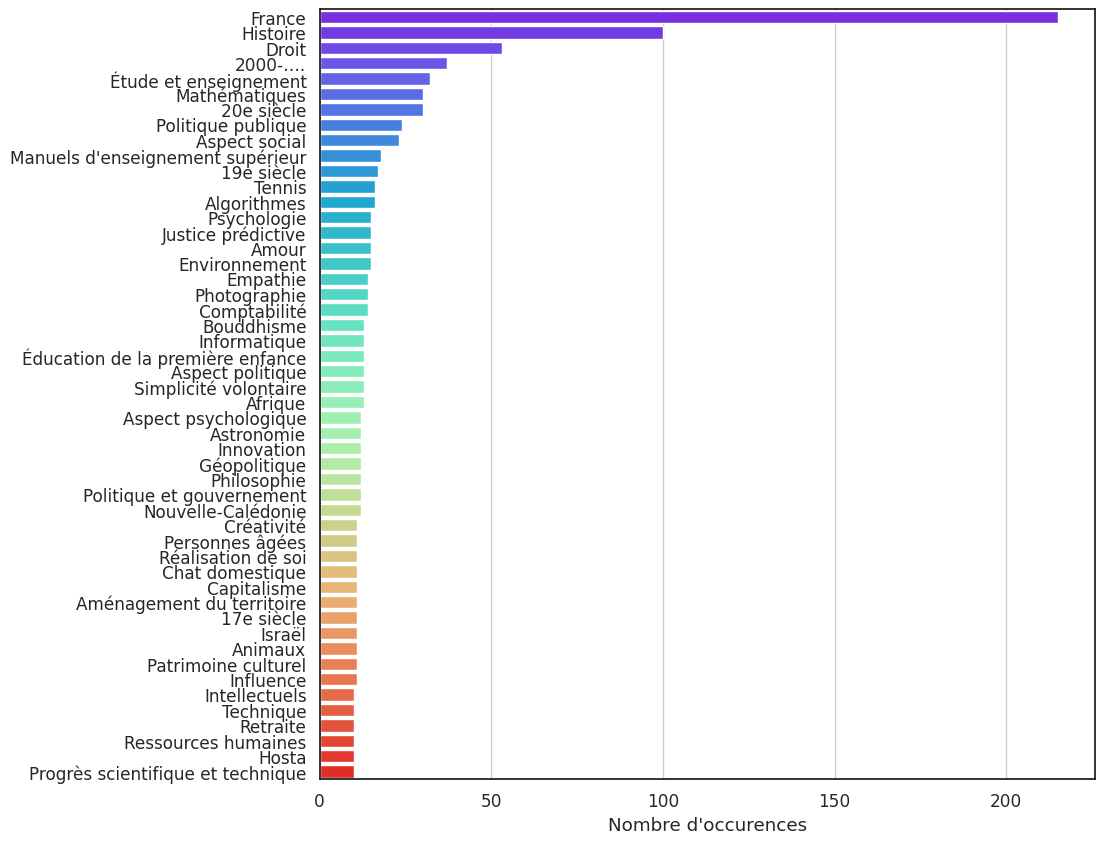

In [48]:
plot_barplot_of_tags(
    keywords,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_concept_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

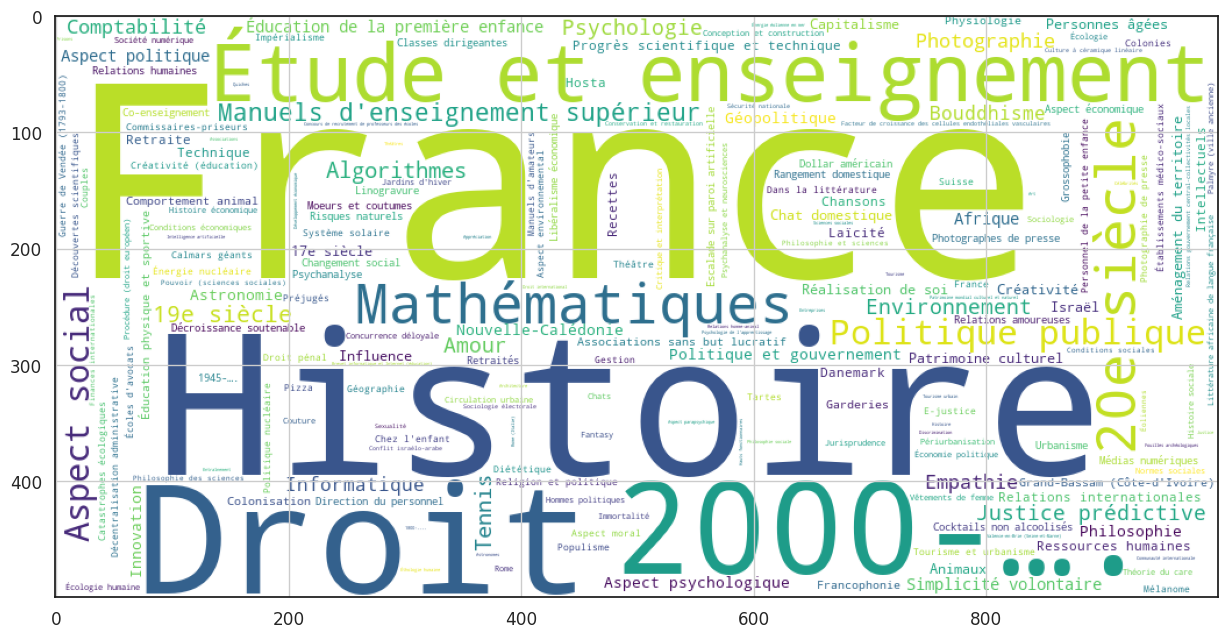

In [49]:
plot_wordcloud(
    keywords,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_reindexation.png",
)

In [50]:
all_concepts = df["rameau_concepts"] + df["embeddings_autorites"] + df["rameau_concept_AFE"] + df["rameau_concept_MCR"] + df["rameau_concept_JMF"] + df["rameau_concept_LPL"] + df["rameau_concept_LJZ"]	+ df["rameau_concept_MPD"]
keywords2 = flatten(all_concepts)
print(f"Le dataset contient {len(set(keywords2))} concepts RAMEAU differents")

Le dataset contient 1275 concepts RAMEAU differents


In [51]:
# Verification que toutes les vedettes appartiennent au referenciel RAMEAU
RAMEAU = ram["NOM"].to_list()
keywords = list(map(lambda x: x.lstrip().rstrip(), keywords)) 
if all([item in RAMEAU for item in keywords]):
    print("Tous les mots clés sont des concepts rameau")
else:
    check = [item in RAMEAU for item in keywords]
    bad_keywords = []
    for i in range(len(check)):
        if not check[i]:
            bad_keywords.append(keywords[i])
 
    unknown_concepts = list(set(bad_keywords))
    print(f"{len(unknown_concepts)} mots clés absents du répertoire RAMEAU sur un total de {len(set(keywords))}")

210 mots clés absents du répertoire RAMEAU sur un total de 1215


In [52]:
# Save list of badly formatted concepts, for check
with open(os.path.join(data_path, "concepts_a_verifier.txt"), "w") as output:
    output.write(str(unknown_concepts))
unknown_concepts

['',
 'Brevet informatique et internet (éducation)',
 '20e siècle',
 '1958-.... (5e République)',
 'Dessin',
 '1970-….',
 'Attitude envers la mort',
 'Classicisme (Littérature)',
 'Rome (Italie',
 'Aspect cognitif',
 'Thèmes',
 'Cancers',
 '1970-....',
 'Récits personnnels',
 'Histoire et fiction',
 "Questions d'examens",
 'Projets urbains',
 '1789-1799 (Révolution)',
 'Israel',
 'Quiche',
 'Nouvelle-Caléronie',
 'Afrique francophone',
 'Méthodes expérimentales',
 '1500-1800',
 'Performances (sport)',
 'Le Lazzaro  (Calvados ; site archéologique)',
 'Escrocs et escroquerie',
 'Île-de-France (France)',
 '1900-1945',
 'Mouvement anti-nucléaire',
 'Aménagemment du territoire',
 'Construction et conception',
 'Seine-et-Marne',
 'Science-fiction post-apocalyptique',
 'Fourier',
 'Empereur',
 'Gestion du risques',
 'Écrivains africains de la langue française',
 'Séries de',
 'Grande-Bretagne',
 'Conflit isréalo-arabe',
 'Ethologie',
 'France',
 'Compétences',
 'Algortithmes',
 'Nouvelle-Calé

In [53]:
print(labels[0])
print(all_concepts[0])

['Bureaucratie', 'Classes dirigeantes', 'Classes dirigeantes', 'Hauts fonctionnaires', 'Hommes politiques', 'Pouvoir (sciences sociales)', 'Pratiques politiques']
['Bureaucratie', 'Classes dirigeantes', 'Classes dirigeantes', 'Hauts fonctionnaires', 'Hommes politiques', 'Pouvoir (sciences sociales)', 'Pratiques politiques', 'État', 'Administration publique', 'Fédéralisme', 'Fonctionnaires', 'Fonction publique', 'Administration', 'Classes dirigeantes', 'France', 'Histoire', 'Pouvoir communautaire', 'France', 'Pouvoir (sciences sociales)', 'Classes dirigeantes ', 'Élite (sciences sociales)', 'Hauts fonctionnaires', 'Classes dirigeantes', "Relations avec l'État", 'France  ', 'Construction nationale', 'France ', 'Leadership politique', 'France', 'Histoire', 'Hauts fonctionnaires', 'France', 'Classes dirigeantes', 'France', '19e siècle', 'Classes dirigeantes', 'France', '20e siècle', 'Classes dirigeantes', 'France', 'Hauts fonctionnaires', 'France', 'Relations gouvernement central-collectiv

# Multilabel classification

## By Concepts

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [55]:
# Binarization
concepts = mlb.fit_transform(all_concepts) # all_concepts
concepts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
sudoc = mlb.transform(df["rameau_concepts"])
embed = mlb.transform(df["embeddings_autorites"])
afe = mlb.transform(df["rameau_concept_AFE"])
mcr = mlb.transform(df["rameau_concept_MCR"])
jmf = mlb.transform(df["rameau_concept_JMF"])
lpl = mlb.transform(df["rameau_concept_LPL"])
ljz = mlb.transform(df["rameau_concept_LJZ"])
mpd = mlb.transform(df["rameau_concept_MPD"])

In [57]:
from itertools import combinations_with_replacement

concept_list = [sudoc, embed, afe, mcr, jmf, lpl, ljz, mpd]
index_name = ["sudoc", "embeddings", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
results = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    results[name] = label_metrics_report("reindexation_concepts", y_true=concept[0], y_pred=concept[1], zero_division=0)

comparing sudoc and  sudoc
comparing sudoc and  embeddings
comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing embeddings and  embeddings
comparing embeddings and  afe
comparing embeddings and  mcr
comparing embeddings and  jmf
comparing embeddings and  lpl
comparing embeddings and  ljz
comparing embeddings and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


### Dataframe of results

In [58]:
result_df = pd.DataFrame(results).T
result_df

Hamming Loss Brier Loss  Accuracy Precision - Macro   
sudoc-sudoc                    0.0        NaN       1.0          0.189804  \
sudoc-embeddings          0.005767        NaN       0.0          0.067182   
sudoc-afe                  0.00324        NaN  0.040404           0.06617   
sudoc-mcr                 0.003399        NaN  0.030303          0.055634   
sudoc-jmf                 0.004167        NaN  0.020202          0.062103   
sudoc-lpl                 0.003272        NaN  0.040404          0.077827   
sudoc-ljz                  0.00385        NaN  0.010101          0.052713   
sudoc-mpd                 0.002963        NaN  0.080808          0.091004   
embeddings-embeddings          0.0        NaN       1.0          0.431373   
embeddings-afe            0.006441        NaN       0.0          0.058187   
embeddings-mcr            0.006552        NaN       0.0          0.055765   
embeddings-jmf            0.007098        NaN       0.0          0.066512   
embeddings-lpl            0.006583        NaN       0.0          0.065574   
embeddings-ljz            0.006655        NaN       0.0          0.062644   
embeddings-mpd            0.006465        NaN       0.0          0.072997   
afe-afe                        0.0        NaN       1.0          0.207843   
afe-mcr                   0.003597        NaN  0.050505          0.067922   
afe-jmf                   0.003937        NaN  0.030303          0.080913   
afe-lpl                   0.003185        NaN  0.020202          0.085248   
afe-ljz                   0.003177        NaN  0.010101          0.090108   
afe-mpd                   0.002686        NaN  0.090909          0.110127   
mcr-mcr                        0.0        NaN       1.0          0.224314   
mcr-jmf                   0.004286        NaN  0.010101          0.070578   
mcr-lpl                   0.003708        NaN       0.0          0.069342   
mcr-ljz                   0.003937        NaN       0.0            0.0647   
mcr-mpd                   0.003478        NaN  0.050505          0.082534   
jmf-jmf                        0.0        NaN       1.0           0.28549   
jmf-lpl                   0.004223        NaN  0.020202           0.07516   
jmf-ljz                   0.004405        NaN  0.010101           0.07022   
jmf-mpd                   0.004009        NaN  0.020202          0.087736   
lpl-lpl                        0.0        NaN       1.0          0.219608   
lpl-ljz                   0.003716        NaN  0.010101          0.072157   
lpl-mpd                   0.003034        NaN  0.070707          0.098369   
ljz-ljz                        0.0        NaN       1.0          0.232157   
ljz-mpd                   0.003549        NaN  0.020202           0.08215   
mpd-mpd                        0.0        NaN       1.0          0.230588   

                      Recall - Macro F1_Score - Macro Jaccard - Macro   
sudoc-sudoc                 0.189804         0.189804        0.189804  \
sudoc-embeddings            0.073782         0.067569        0.063506   
sudoc-afe                   0.068179         0.066412         0.06439   
sudoc-mcr                   0.055761         0.054858        0.052773   
sudoc-jmf                   0.062446         0.061521        0.060079   
sudoc-lpl                   0.077815         0.076758        0.075251   
sudoc-ljz                    0.05212         0.051412        0.049681   
sudoc-mpd                   0.092866         0.090636        0.088386   
embeddings-embeddings       0.431373         0.431373        0.431373   
embeddings-afe              0.057224         0.056428        0.053249   
embeddings-mcr              0.053145         0.052752        0.049884   
embeddings-jmf              0.062528         0.063346        0.061285   
embeddings-lpl              0.063237         0.063242         0.06068   
embeddings-ljz              0.060185         0.059984        0.057124   
embeddings-mpd              0.069073         0.069363        0.065922   
afe-

In [59]:
# Get max score
result_df.sort_values(by="Hamming Loss")

Hamming Loss Brier Loss  Accuracy Precision - Macro   
sudoc-sudoc                    0.0        NaN       1.0          0.189804  \
ljz-ljz                        0.0        NaN       1.0          0.232157   
lpl-lpl                        0.0        NaN       1.0          0.219608   
jmf-jmf                        0.0        NaN       1.0           0.28549   
mcr-mcr                        0.0        NaN       1.0          0.224314   
afe-afe                        0.0        NaN       1.0          0.207843   
embeddings-embeddings          0.0        NaN       1.0          0.431373   
mpd-mpd                        0.0        NaN       1.0          0.230588   
afe-mpd                   0.002686        NaN  0.090909          0.110127   
sudoc-mpd                 0.002963        NaN  0.080808          0.091004   
lpl-mpd                   0.003034        NaN  0.070707          0.098369   
afe-ljz                   0.003177        NaN  0.010101          0.090108   
afe-lpl                   0.003185        NaN  0.020202          0.085248   
sudoc-afe                  0.00324        NaN  0.040404           0.06617   
sudoc-lpl                 0.003272        NaN  0.040404          0.077827   
sudoc-mcr                 0.003399        NaN  0.030303          0.055634   
mcr-mpd                   0.003478        NaN  0.050505          0.082534   
ljz-mpd                   0.003549        NaN  0.020202           0.08215   
afe-mcr                   0.003597        NaN  0.050505          0.067922   
mcr-lpl                   0.003708        NaN       0.0          0.069342   
lpl-ljz                   0.003716        NaN  0.010101          0.072157   
sudoc-ljz                  0.00385        NaN  0.010101          0.052713   
mcr-ljz                   0.003937        NaN       0.0            0.0647   
afe-jmf                   0.003937        NaN  0.030303          0.080913   
jmf-mpd                   0.004009        NaN  0.020202          0.087736   
sudoc-jmf                 0.004167        NaN  0.020202          0.062103   
jmf-lpl                   0.004223        NaN  0.020202           0.07516   
mcr-jmf                   0.004286        NaN  0.010101          0.070578   
jmf-ljz                   0.004405        NaN  0.010101           0.07022   
sudoc-embeddings          0.005767        NaN       0.0          0.067182   
embeddings-afe            0.006441        NaN       0.0          0.058187   
embeddings-mpd            0.006465        NaN       0.0          0.072997   
embeddings-mcr            0.006552        NaN       0.0          0.055765   
embeddings-lpl            0.006583        NaN       0.0          0.065574   
embeddings-ljz            0.006655        NaN       0.0          0.062644   
embeddings-jmf            0.007098        NaN       0.0          0.066512   

                      Recall - Macro F1_Score - Macro Jaccard - Macro   
sudoc-sudoc                 0.189804         0.189804        0.189804  \
ljz-ljz                     0.232157         0.232157        0.232157   
lpl-lpl                     0.219608         0.219608        0.219608   
jmf-jmf                      0.28549          0.28549         0.28549   
mcr-mcr                     0.224314         0.224314        0.224314   
afe-afe                     0.207843         0.207843        0.207843   
embeddings-embeddings       0.431373         0.431373        0.431373   
mpd-mpd                     0.230588         0.230588        0.230588   
afe-mpd                     0.109051           0.1078        0.103747   
sudoc-mpd                   0.092866         0.090636        0.088386   
lpl-mpd                     0.099532         0.097573        0.094876   
afe-ljz                     0.089902         0.088925        0.086474   
afe-lpl                     0.086038         0.084095        0.081145   
sudoc-afe                   0.068179         0.066412         0.06439   
sudoc-lpl                   0.077815         0.076758        0.075251   
sudo

### Plot

In [60]:
# Plot results
metrics_radar_plot(
    result_df,
    remove_identity=True,
    title="Prédiction des concepts",
    savefig="metrics_reindexation_concepts_raw.html",)

In [62]:
metrics_radar_plot(
    result_df, 
    remove_identity=False, 
    title="Quantitative comparisons, Scaled, with identity",
    savefig="metrics_reindexation.html",)

#### Metrics on few samples

In [175]:
# Set Choices
idx = range(49, 55)
compare1 = ["rameau_concepts", sudoc]  # "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE", "rameau_concept_MCR", "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ","rameau_concept_MPD"
compare2 = ["rameau_concept_LJZ", ljz]  # "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE", "rameau_concept_MCR", "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ","rameau_concept_MPD"

In [176]:
pd.set_option('display.max_colwidth', None)
df.loc[idx, [compare1[0], compare2[0]]]

rameau_concepts  \
49                                                                  [Rangement domestique]   
50                                                                                [Tartes]   
51                                                               [Immortalité, Spiritisme]   
52                                                        [Associations sans but lucratif]   
53  [Philosophie de l'environnement, Philosophie de la nature, Éthique de l'environnement]   
54                                                                    [Moeurs et coutumes]   

                                                              rameau_concept_LJZ  
49            [Rangement domestique, Mode de vie durable, Simplicité volontaire]  
50                                                      [Quiches, Pizza, Tartes]  
51                                                 [Vie future, Esprit et corps]  
52                  [Associations, Droit, Fondations, Associations, Subventions]  
53  [Droit naturel, Contrat social, Philosophie politique, Environnement, Droit]  
54                                                           [Culture, Danemark]

In [177]:
concept_list = [compare1[1][idx], compare2[1][idx]]
index_name = [compare1[0], compare2[0]]
results = dict()

name = str(index_name[0] + '-' + index_name[1])
results[name] = label_metrics_report("reindexation_concepts", y_true=concept_list[0], y_pred=concept_list[1], zero_division=0)
result_df = pd.DataFrame(results)
result_df.drop(index=["F1-measure", "Jaccard", "Precision", "Recall"])

rameau_concepts-rameau_concept_LJZ
Accuracy                                          0.0
Brier Loss                                        NaN
F1_Score - Macro                              0.00124
F1_Score - Sample                            0.166667
Hamming Loss                                 0.002067
Jaccard - Macro                               0.00124
Jaccard - Sample                             0.111111
Precision - Macro                             0.00124
Precision - Sample                           0.111111
Recall - Macro                                0.00124
Recall - Sample                              0.333333

In [178]:
# Plot results
metrics_radar_plot(
    result_df.T,
    title="Prédiction des concepts par Indexeur")

### Compare with machine learning predictions

In [179]:
ml_metrics = pd.read_csv("MLclassifier_results_test_set.csv", header=0, index_col=0).T
ml_metrics

Hamming Loss              Accuracy  \
MultinomialNB_LP   0.0001322311982322104  0.018950868119689695   
knn_LP            0.00021603331807448304    0.0393424455116365   

                      Precision - Macro         Recall - Macro  \
MultinomialNB_LP  0.0015016726611205191  0.0008959501145058555   
knn_LP             0.027605826445469325    0.01648919386345649   

                       F1_Score - Macro        Jaccard - Macro  \
MultinomialNB_LP  0.0005864847168945469  0.0003475203644449817   
knn_LP             0.017971248101380947   0.012594985351882021   

                   Precision - Sample     Recall - Sample  \
MultinomialNB_LP  0.07825390961704222  0.0406139739257582   
knn_LP            0.09547756844395189  0.0853830983591789   

                    F1_Score - Sample    Jaccard - Sample  \
MultinomialNB_LP  0.04962528687500982  0.0402406032993399   
knn_LP            0.08440192594727164  0.0710126392422778   

                                                                                                      Precision  \
MultinomialNB_LP  {'Macro': 0.0015016726611205191, 'Micro': 0.07981834695731153, 'Sample': 0.07825390961704222}   
knn_LP             {'Macro': 0.027605826445469325, 'Micro': 0.05858801407126483, 'Sample': 0.09547756844395189}   

                                                                                                         Recall  \
MultinomialNB_LP  {'Macro': 0.0008959501145058555, 'Micro': 0.030415040008860094, 'Sample': 0.0406139739257582}   
knn_LP               {'Macro': 0.01648919386345649, 'Micro': 0.07677824847024947, 'Sample': 0.0853830983591789}   

                                                                                                     F1-measure  \
MultinomialNB_LP  {'Macro': 0.0005864847168945469, 'Micro': 0.04404615122445092, 'Sample': 0.04962528687500982}   
knn_LP             {'Macro': 0.017971248101380947, 'Micro': 0.06646094850055424, 'Sample': 0.08440192594727164}   

                                                                                                        Jaccard  
MultinomialNB_LP  {'Macro': 0.0003475203644449817, 'Micro': 0.022519013550357722, 'Sample': 0.0402406032993399}  
knn_LP              {'Macro': 0.012594985351882021, 'Micro': 0.03437269521348134, 'Sample': 0.0710126392422778}

In [180]:
ml_metrics["Hamming Loss"] = ml_metrics["Hamming Loss"].astype(float)
ml_metrics["Accuracy"] = ml_metrics["Accuracy"].astype(float)
ml_metrics["Precision - Sample"] = ml_metrics["Precision - Sample"].astype(float)
ml_metrics["Recall - Sample"] = ml_metrics["Recall - Sample"].astype(float)
ml_metrics["F1_Score - Sample"] = ml_metrics["F1_Score - Sample"].astype(float)
ml_metrics["Jaccard - Sample"] = ml_metrics["Jaccard - Sample"].astype(float)


In [181]:
all_results = result_df.append(ml_metrics)
all_results

rameau_concepts-rameau_concept_LJZ  \
Accuracy                                                                                                      0.0   
Brier Loss                                                                                                    NaN   
F1-measure          {'Macro': 0.0012399256044637321, 'Micro': 0.16666666666666669, 'Sample': 0.16666666666666666}   
F1_Score - Macro                                                                                          0.00124   
F1_Score - Sample                                                                                        0.166667   
Hamming Loss                                                                                             0.002067   
Jaccard              {'Macro': 0.0012399256044637321, 'Micro': 0.09090909090909091, 'Sample': 0.1111111111111111}   
Jaccard - Macro                                                                                           0.00124   
Jaccard - Sample                                                                                         0.111111   
Precision            {'Macro': 0.0012399256044637321, 'Micro': 0.13333333333333333, 'Sample': 0.1111111111111111}   
Precision - Macro                                                                                         0.00124   
Precision - Sample                                                                                       0.111111   
Recall                {'Macro': 0.0012399256044637321, 'Micro': 0.2222222222222222, 'Sample': 0.3333333333333333}   
Recall - Macro                                                                                            0.00124   
Recall - Sample                                                                                          0.333333   
MultinomialNB_LP                                                                                              NaN   
knn_LP                                                                                                        NaN   

                    Hamming Loss  Accuracy      Precision - Macro  \
Accuracy                     NaN       NaN                    NaN   
Brier Loss                   NaN       NaN                    NaN   
F1-measure                   NaN       NaN                    NaN   
F1_Score - Macro             NaN       NaN                    NaN   
F1_Score - Sample            NaN       NaN                    NaN   
Hamming Loss                 NaN       NaN                    NaN   
Jaccard                      NaN       NaN                    NaN   
Jaccard - Macro              NaN       NaN                    NaN   
Jaccard - Sample             NaN       NaN                    NaN   
Precision                    NaN       NaN                    NaN   
Precision - Macro            NaN       NaN                    NaN   
Precision - Sample           NaN       NaN                    NaN   
Recall                       NaN       NaN                    NaN   
Recall - Macro               NaN       NaN                    NaN   
Recall - Sample              NaN       NaN                    NaN   
MultinomialNB_LP        0.000132  0.018951  0.0015016726611205191   
knn_LP                  0.000216  0.039342   0.027605826445469325   

                           Recall - Macro       F1_Score - Macro  \
Accuracy                              NaN                    NaN   
Brier Loss                            NaN                    NaN   
F1-measure                            NaN                    NaN   
F1_Score - Macro                      NaN                    NaN   
F1_Score - Sample                     NaN                    NaN   
Hamming Loss                          NaN                    NaN   
Jaccard                               NaN                    NaN   
Jaccard - Macro                       NaN                    NaN   
Jaccard - Sample                      NaN                    NaN   
Precision                             NaN        

In [66]:
# Plot results
metrics_radar_plot(
    all_results,
    remove_identity=False,
    title="Prédiction des concepts",
    savefig="metrics_reindexation_concepts_raw_MLmodels.html",)

## By indexation Chains

### Get indexation chains

In [67]:
# Mettre à plat TOUTES les chaines d'indexation
pattern = r';;\s*(?![^()$]*\))'

for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_index_chain_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


In [68]:
df.head(3)

PPN                                              TITRE  \
0  000308838  Les sommets de l'État : essai sur l'élite du p...   
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   

                                              RESUME  \
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...   
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   

                                              RAMEAU DEWEY  \
0  Bureaucratie;Classes dirigeantes;Classes dirig...         
1  Dollar américain;Finances internationales;Poli...   320   
2               Intellectuels;Intellectuels français   301   

                                               DESCR  \
0  Les sommets de l'État : essai sur l'élite du p...   
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   

                                rameau_chaines_index  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   

                                     rameau_concepts  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   

                                           INDEX_AFE  \
0  Classes dirigeantes -- France -- Histoire;;Pou...   
1  Dollar américain;;Eurodollar, Marché de l';;Po...   
2  Intellectuels -- France -- 1958-.... (5e Répub...   

                                           INDEX_MCR  \
0  Pouvoir (sciences sociales) -- Classes dirigea...   
1  Dollar américain -- Mondialisation;;Dollar amé...   
2                    Intellectuels -- France -- 1945   

                                           INDEX_JMF  \
0  Classes dirigeantes -- Relations avec l'État -...   
1  Dollar américain ;;Politique économique -- Éta...   
2  Intellectuels français -- Sociologie ;;Intelle...   

                                           INDEX_LPL  \
0  Hauts fonctionnaires -- France;;Classes dirige...   
1  Dollar américain -- Influence -- 20e siècle;;F...   
2  Intellectuels -- France -- 1958 (5e République...   

                                           INDEX_LJZ  \
0  Classes dirigeantes -- France;;Hauts fonctionn...   
1  Dollar américain;;Eurodollar, Marché de l';;Fi...   
2  Intellectuels -- France;;Vie intellectuelle --...   

                                           INDEX_MPD  \
0  Classes dirigeantes -- France -- Histoire;;Éli...   
1  Dollar américain;;Eurodollar, Marché de l';;Fi...   
2  Intellectuels -- France -- 1958-.... (5e Répub...   

                                    embedding_chains  \
0  [État, Administration publique, Fédéralisme, F...   
1  [Dollar américain, Système monétaire internati...   
2  [Intellectuels -- Activité politique, Intellec...   

                                embeddings_autorites  nb_chaine_index_rameau  \
0  [État, Administration publique, Fédéralisme, F...                       7   
1  [Dollar américain, Système monétaire internati...                       3   
2  [Intellectuels, Activité politique, Intellectu...                       2   

   nb_chaine_index_AFE  nb_chaine_index_MCR  nb_chaine_index_JMF  \
0                    2                    2                    3   
1                    3                    2                    3   
2                    1                    1                    2   

   nb_chaine_index_LPL  nb_chaine_index_LJZ  nb_chaine_index_MPD  \
0                    3                    3                    3   
1                    3                    3                    3   
2                    2                    2                    1   

                

## Format data

In [69]:
col_to_keep = ["PPN", "rameau_chaines_index", "embedding_chains", "rameau_index_chain_AFE",
               "rameau_index_chain_MCR", "rameau_index_chain_JMF",
                "rameau_index_chain_LPL", "rameau_index_chain_LJZ", "rameau_index_chain_MPD"]
df_index_chain_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_index_chain_pivot

PPN                variable  \
0    000308838    rameau_chaines_index   
1    00094758X    rameau_chaines_index   
2    003632806    rameau_chaines_index   
3    047450037    rameau_chaines_index   
4    05224170X    rameau_chaines_index   
..         ...                     ...   
787  266197809  rameau_index_chain_MPD   
788  26753177X  rameau_index_chain_MPD   
789  267884575  rameau_index_chain_MPD   
790  268799458  rameau_index_chain_MPD   
791  268924759  rameau_index_chain_MPD   

                                                 value  
0    [Bureaucratie, Classes dirigeantes, Classes di...  
1    [Dollar américain, Finances internationales, P...  
2              [Intellectuels, Intellectuels français]  
3                                         [Bouddhisme]  
4    [Mathématiques -- Étude et enseignement -- Asp...  
..                                                 ...  
787  [Féodalité -- Histoire -- Valence-en-Brie (Sei...  
788  [Société numérique, Algorithmes -- Utilisation...  
789  [Capitalisme -- Critique et interprétation, Dé...  
790                                  [Co-enseignement]  
791                            [Jardinage d'intérieur]  

[792 rows x 3 columns]

In [70]:
chains=df_index_chain_pivot["value"]
chains

0      [Bureaucratie, Classes dirigeantes, Classes di...
1      [Dollar américain, Finances internationales, P...
2                [Intellectuels, Intellectuels français]
3                                           [Bouddhisme]
4      [Mathématiques -- Étude et enseignement -- Asp...
                             ...                        
787    [Féodalité -- Histoire -- Valence-en-Brie (Sei...
788    [Société numérique, Algorithmes -- Utilisation...
789    [Capitalisme -- Critique et interprétation, Dé...
790                                    [Co-enseignement]
791                              [Jardinage d'intérieur]
Name: value, Length: 792, dtype: object

In [71]:
index_chains = flatten(chains)
print(f"Le dataset contient {len(set(index_chains))} chaines d'indexation differentes")

Le dataset contient 1613 chaines d'indexation differentes


In [72]:
# remove strange characters
index_chains2 = [x.lstrip(r";|''").rstrip(r";|''") for x in index_chains]
print(f"Le dataset contient {len(set(index_chains2))} chaines d'indexation differentes")

Le dataset contient 1613 chaines d'indexation differentes


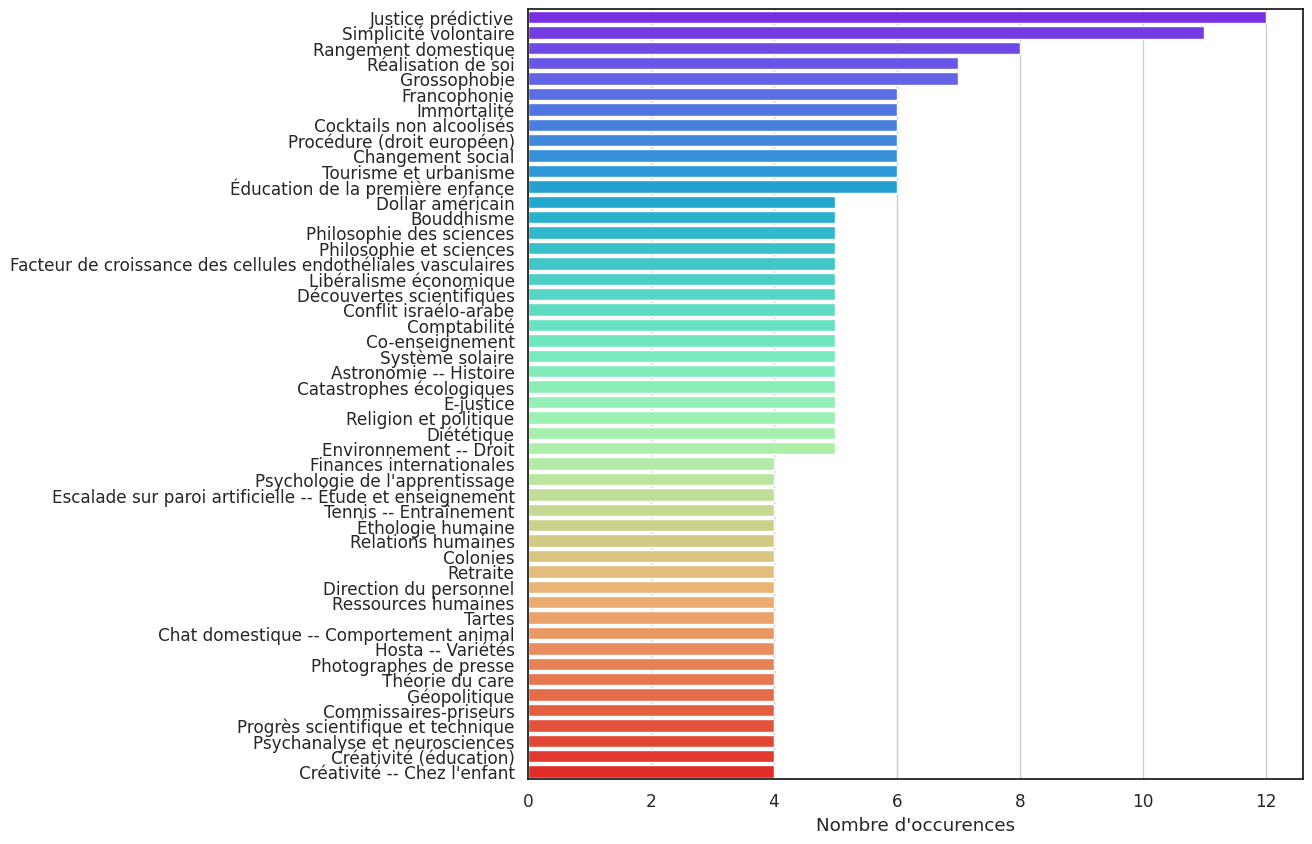

In [73]:
plot_barplot_of_tags(
    index_chains,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_indexationChains_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

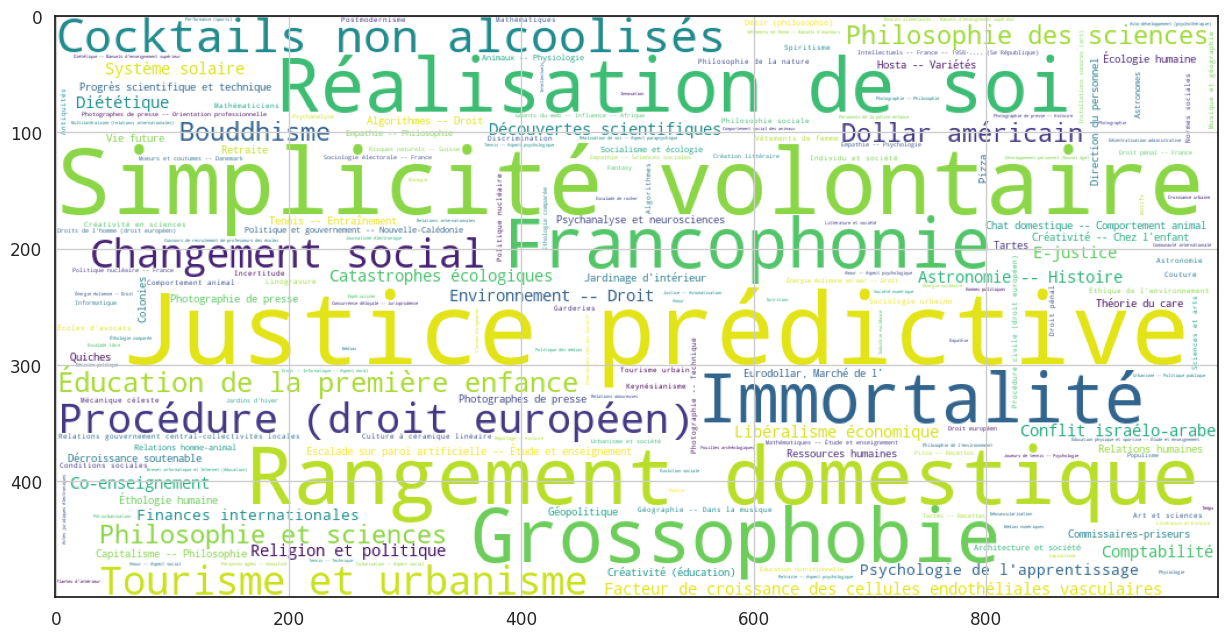

In [74]:
plot_wordcloud(
    index_chains,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_index_chains_reindexation.png",
)

In [75]:
all_chains = df["rameau_chaines_index"] + df["embedding_chains"] + df["rameau_index_chain_AFE"] + df["rameau_index_chain_MCR"] + df["rameau_index_chain_JMF"] + df["rameau_index_chain_LPL"] + df["rameau_index_chain_LJZ"]	+ df["rameau_index_chain_MPD"]
chains2 = flatten(all_chains)
print(f"Le dataset contient {len(set(chains2))} concepts RAMEAU differents")

Le dataset contient 1613 concepts RAMEAU differents


In [76]:
# Binarization
index_chains_rameau = mlb.fit_transform(all_chains) # all indexation chains
index_chains_rameau

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
sudoc = mlb.transform(df["rameau_chaines_index"])
embed = mlb.transform(df["embedding_chains"])
afe = mlb.transform(df["rameau_index_chain_AFE"])
mcr = mlb.transform(df["rameau_index_chain_MCR"])
jmf = mlb.transform(df["rameau_index_chain_JMF"])
lpl = mlb.transform(df["rameau_index_chain_LPL"])
ljz = mlb.transform(df["rameau_index_chain_LJZ"])
mpd = mlb.transform(df["rameau_index_chain_MPD"])

In [78]:
mlb.inverse_transform(embed)

[('Administration',
  'Administration publique',
  'Fonction publique',
  'Fonctionnaires',
  'Fédéralisme',
  'État'),
 ('Convertibilité monétaire',
  'Dollar américain',
  'Marché monétaire',
  'Système monétaire international',
  'Taux de change',
  'Économie monétaire'),
 ('Esprit critique',
  'Intellectuels',
  'Intellectuels -- Activité politique',
  'Propriété intellectuelle (droit européen)',
  'Sociologie de la connaissance',
  'Travail intellectuel'),
 ('Bouddhisme',
  'Bouddhisme -- Anthologies',
  'Bouddhisme -- Doctrines religieuses -- Ouvrages de vulgarisation',
  'Bouddhisme -- Livres sacrés',
  'Dessin -- Aspect religieux -- Bouddhisme',
  "Gestion d'entreprise -- Aspect religieux -- Bouddhisme"),
 ('Apprentissage des concepts',
  'Apprentissage par problèmes',
  'Enseignement -- Pratique',
  "Psychologie de l'apprentissage",
  "Qualité de l'enseignement",
  "Raisonnement -- Chez l'adolescent"),
 ('Monde (philosophie)',
  'Philosophie des sciences',
  'Philosophie et sc

In [79]:
mlb.inverse_transform(sudoc)

[('Bureaucratie',
  'Classes dirigeantes',
  'Hauts fonctionnaires',
  'Hommes politiques',
  'Pouvoir (sciences sociales)',
  'Pratiques politiques'),
 ('Dollar américain', 'Finances internationales', 'Politique monétaire'),
 ('Intellectuels', 'Intellectuels français'),
 ('Bouddhisme',),
 ('Mathématiques -- Étude et enseignement -- Aspect psychologique',
  'Mathématiques -- Étude et enseignement -- Histoire',
  'Mathématiques -- Étude et enseignement -- Sociologie',
  "Psychologie de l'apprentissage"),
 ('Chaos (théorie des systèmes)',
  'Incertitude',
  'Libre arbitre',
  'Philosophie des sciences',
  'Philosophie et sciences',
  'Processus irréversibles',
  'Temps'),
 ('Pouvoir (sciences sociales) -- Histoire',
  'Rites et cérémonies politiques -- Histoire'),
 ('Escalade sur paroi artificielle -- Étude et enseignement',),
 ('Brevet informatique et Internet (éducation)',
  'Informatique -- Étude et enseignement (secondaire)'),
 ('Éoliennes',),
 ('Conditions sociales', 'Conditions éco

In [80]:
from itertools import combinations_with_replacement

concept_list = [sudoc, embed, afe, mcr, jmf, lpl, ljz, mpd]
index_name = ["sudoc", "embeddings", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
result_chains = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    result_chains[name] = label_metrics_report("reindexation_chains", concept[0], concept[1], zero_division=0)

comparing sudoc and  sudoc
comparing sudoc and  embeddings
comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing embeddings and  embeddings
comparing embeddings and  afe
comparing embeddings and  mcr
comparing embeddings and  jmf
comparing embeddings and  lpl
comparing embeddings and  ljz
comparing embeddings and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


In [81]:
df.loc[0:5, ["rameau_chaines_index","embedding_chains"]]

rameau_chaines_index  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   
3                                       [Bouddhisme]   
4  [Mathématiques -- Étude et enseignement -- Asp...   
5  [Chaos (théorie des systèmes), Incertitude, Li...   

                                    embedding_chains  
0  [État, Administration publique, Fédéralisme, F...  
1  [Dollar américain, Système monétaire internati...  
2  [Intellectuels -- Activité politique, Intellec...  
3  [Bouddhisme -- Anthologies, Bouddhisme -- Livr...  
4  [Apprentissage par problèmes, Psychologie de l...  
5  [Philosophie des sciences, Philosophie et scie...

In [84]:
label_metrics_report("reindexation_chains", y_true=sudoc[0:5], y_pred=embed[0:5], zero_division=0, print_metrics=True)

------reindexation_chains Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.0047\Brier score Loss: nan
Precision:
  - Macro: 0.0025
  - Micro: 0.1333
Recall:
  - Macro: 0.0025
  - Micro: 0.2500
F1-measure:
  - Macro: 0.0025
  - Micro: 0.1739
Jaccard similarity:
  - Macro: 0.0025
  - Micro: 0.0952


/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



{'Hamming Loss': 0.004711717296962182,
 'Brier Loss': nan,
 'Accuracy': 0.0,
 'Precision - Macro': 0.0024798512089274642,
 'Recall - Macro': 0.0024798512089274642,
 'F1_Score - Macro': 0.0024798512089274642,
 'Jaccard - Macro': 0.0024798512089274642,
 'Precision - Sample': 0.13333333333333333,
 'Recall - Sample': 0.41666666666666663,
 'F1_Score - Sample': 0.19158730158730158,
 'Jaccard - Sample': 0.10912698412698414,
 'Precision': {'Macro': 0.0024798512089274642,
  'Micro': 0.13333333333333333,
  'Sample': 0.13333333333333333},
 'Recall': {'Macro': 0.0024798512089274642,
  'Micro': 0.25,
  'Sample': 0.41666666666666663},
 'F1-measure': {'Macro': 0.0024798512089274642,
  'Micro': 0.1739130434782609,
  'Sample': 0.19158730158730158},
 'Jaccard': {'Macro': 0.0024798512089274642,
  'Micro': 0.09523809523809523,
  'Sample': 0.10912698412698414}}

### Dataframe of results

In [82]:
result_chains_df = pd.DataFrame(result_chains).T
result_chains_df

Hamming Loss Brier Loss  Accuracy Precision - Macro  \
sudoc-sudoc                    0.0        NaN       1.0          0.140112   
sudoc-embeddings          0.004346        NaN       0.0          0.040298   
sudoc-afe                 0.002449        NaN  0.030303          0.014259   
sudoc-mcr                 0.002323        NaN  0.030303           0.00775   
sudoc-jmf                 0.002712        NaN  0.010101          0.016326   
sudoc-lpl                 0.002517        NaN  0.040404          0.019839   
sudoc-ljz                  0.00268        NaN  0.010101          0.015499   
sudoc-mpd                 0.002342        NaN  0.070707          0.025728   
embeddings-embeddings          0.0        NaN       1.0          0.354619   
embeddings-afe            0.004703        NaN       0.0          0.016119   
embeddings-mcr            0.004653        NaN       0.0           0.00589   
embeddings-jmf            0.004903        NaN       0.0          0.020562   
embeddings-lpl            0.004822        NaN       0.0          0.019219   
embeddings-ljz            0.004834        NaN       0.0          0.022009   
embeddings-mpd            0.004709        NaN       0.0          0.022009   
afe-afe                        0.0        NaN       1.0          0.127092   
afe-mcr                   0.002154        NaN  0.040404          0.008679   
afe-jmf                   0.002555        NaN  0.020202          0.016016   
afe-lpl                   0.002411        NaN  0.010101          0.017359   
afe-ljz                   0.002311        NaN  0.010101          0.025418   
afe-mpd                    0.00196        NaN  0.080808          0.036888   
mcr-mcr                        0.0        NaN       1.0          0.101674   
mcr-jmf                    0.00253        NaN       0.0           0.00527   
mcr-lpl                   0.002436        NaN       0.0            0.0031   
mcr-ljz                   0.002474        NaN       0.0           0.00558   
mcr-mpd                   0.002248        NaN  0.020202          0.009919   
jmf-jmf                        0.0        NaN       1.0          0.156851   
jmf-lpl                   0.002774        NaN  0.010101          0.014879   
jmf-ljz                   0.002812        NaN  0.010101          0.016119   
jmf-mpd                   0.002561        NaN  0.020202          0.022319   
lpl-lpl                        0.0        NaN       1.0          0.142591   
lpl-ljz                   0.002693        NaN  0.010101          0.015809   
lpl-mpd                   0.002204        NaN  0.040404          0.033478   
ljz-ljz                        0.0        NaN       1.0          0.150651   
ljz-mpd                    0.00248        NaN  0.020202          0.023869   
mpd-mpd                        0.0        NaN       1.0          0.139492   

                      Recall - Macro F1_Score - Macro Jaccard - Macro  \
sudoc-sudoc                 0.140112         0.140112        0.140112   
sudoc-embeddings            0.040918         0.040298        0.039678   
sudoc-afe                   0.014259         0.014259        0.014259   
sudoc-mcr                    0.00775         0.007646         0.00744   
sudoc-jmf                   0.016739         0.016429        0.016326   
sudoc-lpl                   0.019219         0.019426        0.019219   
sudoc-ljz                   0.015499         0.015499        0.015499   
sudoc-mpd                   0.025728         0.025625        0.025418   
embeddings-embeddings       0.354619         0.354619        0.354619   
embeddings-afe              0.015809         0.015912        0.015809   
embeddings-mcr                0.0062         0.005993         0.00589   
embeddings-jmf              0.020459         0.020335        0.019942   
embeddings-lpl              0.017876         0.018289        0.017876   
embeddings-ljz              0.020769         0.021182        0.020665   
embeddings-mpd              0.020769         0.021182        0.020665   
afe-

In [83]:
# Get max score
result_chains_df.sort_values(by="Hamming Loss")

Hamming Loss Brier Loss  Accuracy Precision - Macro  \
sudoc-sudoc                    0.0        NaN       1.0          0.140112   
ljz-ljz                        0.0        NaN       1.0          0.150651   
lpl-lpl                        0.0        NaN       1.0          0.142591   
jmf-jmf                        0.0        NaN       1.0          0.156851   
mcr-mcr                        0.0        NaN       1.0          0.101674   
afe-afe                        0.0        NaN       1.0          0.127092   
embeddings-embeddings          0.0        NaN       1.0          0.354619   
mpd-mpd                        0.0        NaN       1.0          0.139492   
afe-mpd                    0.00196        NaN  0.080808          0.036888   
afe-mcr                   0.002154        NaN  0.040404          0.008679   
lpl-mpd                   0.002204        NaN  0.040404          0.033478   
mcr-mpd                   0.002248        NaN  0.020202          0.009919   
afe-ljz                   0.002311        NaN  0.010101          0.025418   
sudoc-mcr                 0.002323        NaN  0.030303           0.00775   
sudoc-mpd                 0.002342        NaN  0.070707          0.025728   
afe-lpl                   0.002411        NaN  0.010101          0.017359   
mcr-lpl                   0.002436        NaN       0.0            0.0031   
sudoc-afe                 0.002449        NaN  0.030303          0.014259   
mcr-ljz                   0.002474        NaN       0.0           0.00558   
ljz-mpd                    0.00248        NaN  0.020202          0.023869   
sudoc-lpl                 0.002517        NaN  0.040404          0.019839   
mcr-jmf                    0.00253        NaN       0.0           0.00527   
afe-jmf                   0.002555        NaN  0.020202          0.016016   
jmf-mpd                   0.002561        NaN  0.020202          0.022319   
sudoc-ljz                  0.00268        NaN  0.010101          0.015499   
lpl-ljz                   0.002693        NaN  0.010101          0.015809   
sudoc-jmf                 0.002712        NaN  0.010101          0.016326   
jmf-lpl                   0.002774        NaN  0.010101          0.014879   
jmf-ljz                   0.002812        NaN  0.010101          0.016119   
sudoc-embeddings          0.004346        NaN       0.0          0.040298   
embeddings-mcr            0.004653        NaN       0.0           0.00589   
embeddings-afe            0.004703        NaN       0.0          0.016119   
embeddings-mpd            0.004709        NaN       0.0          0.022009   
embeddings-lpl            0.004822        NaN       0.0          0.019219   
embeddings-ljz            0.004834        NaN       0.0          0.022009   
embeddings-jmf            0.004903        NaN       0.0          0.020562   

                      Recall - Macro F1_Score - Macro Jaccard - Macro  \
sudoc-sudoc                 0.140112         0.140112        0.140112   
ljz-ljz                     0.150651         0.150651        0.150651   
lpl-lpl                     0.142591         0.142591        0.142591   
jmf-jmf                     0.156851         0.156851        0.156851   
mcr-mcr                     0.101674         0.101674        0.101674   
afe-afe                     0.127092         0.127092        0.127092   
embeddings-embeddings       0.354619         0.354619        0.354619   
mpd-mpd                     0.139492         0.139492        0.139492   
afe-mpd                     0.036888         0.036784        0.036578   
afe-mcr                     0.008679         0.008679        0.008679   
lpl-mpd                     0.033478         0.033478        0.033478   
mcr-mpd                     0.009919         0.009919        0.009919   
afe-ljz                     0.026038         0.025625        0.025418   
sudoc-mcr                    0.00775         0.007646         0.00744   
sudoc-mpd                   0.025728         0.025625        0.025418   
afe-

### Plot

In [84]:
# Plot results
metrics_radar_plot(
    result_chains_df,
    remove_identity=False,
    title="Prédiction des chaines d'indexation",
    savefig="metrics_reindexation_Chains_raw.html",)

## Bag of words (tf-idf or CountVectorizer)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### tfID vectorizer

In [ ]:
def identity_tokenizer(text):
    return text
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)

In [ ]:
labels

0      [Bureaucratie, Classes dirigeantes, Classes di...
1      [Dollar américain, Finances internationales, P...
2                [Intellectuels, Intellectuels français]
3                                           [Bouddhisme]
4      [Mathématiques, Étude et enseignement, Aspect ...
                             ...                        
787    [Féodalité, Histoire, Valence-en-Brie (Seine-e...
788    [Société numérique, Algorithmes, Utilisation, ...
789    [Capitalisme, Critique et interprétation, Dési...
790                                    [Co-enseignement]
791                              [Jardinage d'intérieur]
Name: value, Length: 792, dtype: object

In [ ]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels)
autorites = vectorizer.get_feature_names_out()
autorites

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['', ' 1793-1794)', ' 1793-1794) Guerre de Vendée (1793-1800)', ...,
       'Île-de-France (France) 1945-1970',
       "Île-de-France (France) 1945-1970 Constructions d'urgence",
       'Île-de-France (France) 1945-1970 Habitations individuelles'],
      dtype=object)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

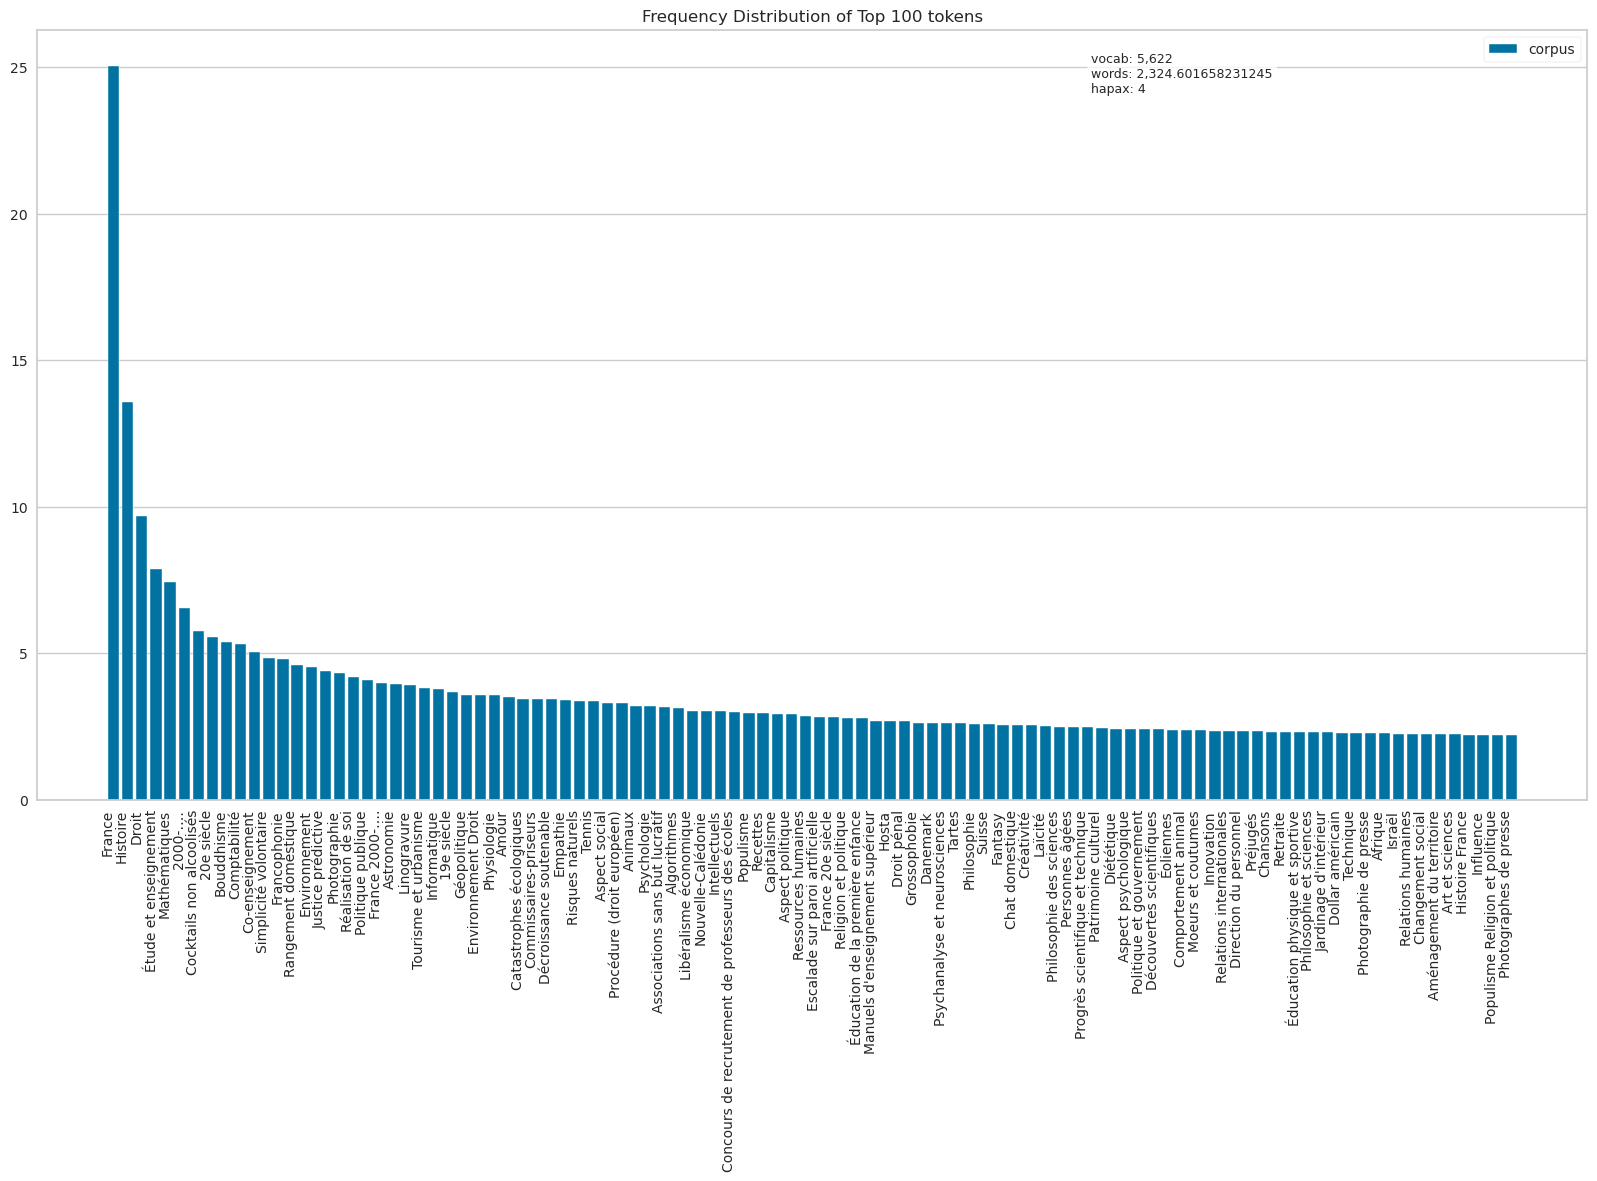

<Axes: title={'center': 'Frequency Distribution of Top 100 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(20, 10))
features = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, n=100, orient="v")
visualizer.fit(vectorised_concepts)
visualizer.show()

In [90]:
# Visualize the dataset with T-SNE
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

### Count vectorizer

In [ ]:
vectorizer = CountVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)
vectorised_concepts = vectorizer.fit_transform(df_pivot["value"])

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels, df_pivot["variable"])
autorites = vectorizer.get_feature_names_out()
autorites

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['', ' Le Lazzaro (Calvados ; site archéologique)',
       '1500-.... (Période moderne)', ...,
       'Île-de-France (France) 1945-1970',
       "Île-de-France (France) 1945-1970 Constructions d'urgence",
       'Île-de-France (France) 1945-1970 Habitations individuelles'],
      dtype=object)

In [ ]:
vectorised_concepts

<770x4242 sparse matrix of type '<class 'numpy.int64'>'
	with 6618 stored elements in Compressed Sparse Row format>

In [ ]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

## Test kmeans


In [ ]:
# Select columns to use
concept_cols = [
    "rameau_concepts", "rameau_concept_AFE", "rameau_concept_MCR",
    "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ",
    "rameau_concept_MPD"]
df_for_analysis = df[concept_cols]
labels_encoded = pd.DataFrame(mlb.fit_transform(flatten(df_pivot["value"])))

In [ ]:
labels_encoded

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3127   1   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
3128   1   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
3129   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
3130   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
0      0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3127   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
3128   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3129   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3130   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

      36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  \
0      0   0   0   0   0   0   0   0   1   0   1   0   1   0   0   0   1   0   
1      0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   
2      0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   
3      0   0   0   0   0   0   0   0   1   0   1   0   1   1   0   0   1   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   1   0   
3127   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   1   0   
3128   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   1   0   
3129   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   1   0   
3130   0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   

      54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  \
0      0   0   0   0   0   0   0   1   0   1   1   0   0   0   0   0   0   0   
1      0   1   0   1   0   0   0   1   1   1   0   0   0   0   0   0   0   0   
2      0   1   0   1   0   0   0   1   1   1   0   0   0   0   0   0   0   0   
3      0   0   0   1   1   0   0   1   1   1   1   0   0   0   0   0   0   0   
4      0   1   1   0   1   1   1   0   1   1   1   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   1   1   1   1   1   0   1   1   0   0   0   0   0   0   0   
3127   0   1   0   0   1   1   0   1   1   0   0   0   0   0   0   0   0   0   
3128   0   1   0   1   1   1   0   0   1   0   0   0   0   0   0   0   0   0   
3129   0   0   1   1   1   0   0   0   1   1   0   0   0   0   0   0   0   0   
3130   0   0   0   1   0   0   0   1   0   1   1   0   0   0   0   0   0   0   

      72  73  74  75  76  77  78  79  80  81  82  83  
0      0   0   0   0   0   0   0   0   0   0   0   0  
1      0   0   0   0   0   0   0   0   0   0   0   0

In [ ]:
len(labels_encoded), len(labels_encoded[0])

(3131, 3131)

In [ ]:
# Clustering based on Kmeans
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# test different clusters
sil = []
davis_bouldin = []
sum_of_squared_distances = []
param_range = range(3,80)
for k in param_range:
    print(f"Clustering with {k} groups")
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(labels_encoded)
    labels = kmeans.labels_
    sum_of_squared_distances.append(kmeans.inertia_)
    silh = silhouette_score(
        labels_encoded, labels, metric="euclidean", sample_size=50000, random_state=200
        )
    dav = davies_bouldin_score(labels_encoded, labels)
    sil.append(silh)
    davis_bouldin.append(dav)

Clustering with 3 groups
Clustering with 4 groups
Clustering with 5 groups
Clustering with 6 groups
Clustering with 7 groups
Clustering with 8 groups
Clustering with 9 groups
Clustering with 10 groups
Clustering with 11 groups
Clustering with 12 groups
Clustering with 13 groups
Clustering with 14 groups
Clustering with 15 groups
Clustering with 16 groups
Clustering with 17 groups
Clustering with 18 groups
Clustering with 19 groups
Clustering with 20 groups
Clustering with 21 groups
Clustering with 22 groups
Clustering with 23 groups
Clustering with 24 groups
Clustering with 25 groups
Clustering with 26 groups
Clustering with 27 groups
Clustering with 28 groups
Clustering with 29 groups
Clustering with 30 groups
Clustering with 31 groups
Clustering with 32 groups
Clustering with 33 groups
Clustering with 34 groups
Clustering with 35 groups
Clustering with 36 groups
Clustering with 37 groups
Clustering with 38 groups
Clustering with 39 groups
Clustering with 40 groups
Clustering with 41 

In [ ]:
# Find optimal values accordin to silhouette and Davis-Bouldin scores
opt_val_sil = param_range[sil.index(max(sil))]
opt_val_db = param_range[davis_bouldin.index(min(davis_bouldin))]

In [ ]:
def plot_metrics(
    sil, davis_bouldin, param_name, param_range, silhouette_color="red", db_color="blue"
):
    """
    Plot the silhouette score and davies_bouldin score for a range of cluster number.

    Parameters:
    -----------
        - sil (list): list of silhouette scores for all values of hyper-parameter range
        - davis_bouldin (list): list of davies-bouldin scores along hyper-parameter range
        - param_name (str): name of the hyper-parameter to be fined-tuned
        - param_range (list) : range of possible values for hyper-parameter tuning
        - silhouette_color (str): color for the silhouette score (defaut: 'red')
        - db_color (str): color for the silhouette score (defaut: 'blue')

    Returns :
    ---------
        - Evolution of silhouette and Davies-bouldin scores along hyper-parameter range
    """

    # plot
    _, ax1 = plt.subplots()
    ax1.set_xlabel(param_name)
    ax1.set_ylabel("Silhouette_score", color=silhouette_color)
    ax1.plot(param_range, sil, color=silhouette_color)
    ax1.tick_params(axis="y", labelcolor=silhouette_color)

    # Adding Twin Axes
    ax2 = ax1.twinx()
    ax2.set_ylabel("Davies_bouldin", color=db_color)
    ax2.plot(param_range, davis_bouldin, color=db_color)
    ax2.tick_params(axis="y", labelcolor=db_color)

    # Show plot
    plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

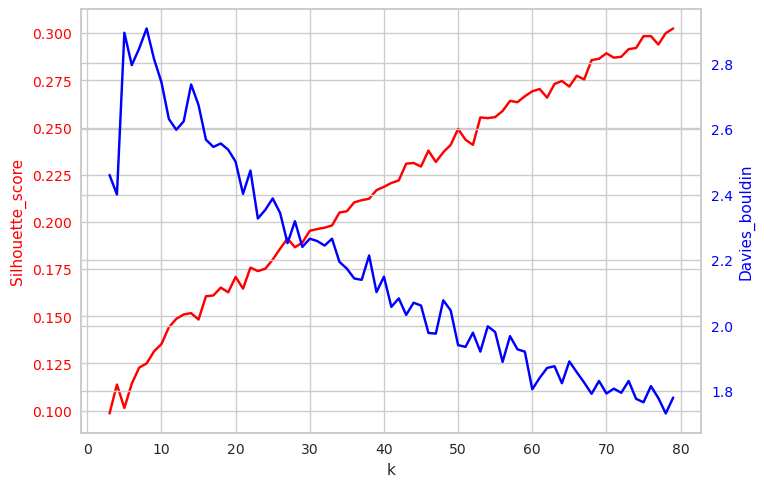

In [ ]:
plot_metrics(sil, davis_bouldin, param_name="k", param_range=param_range, silhouette_color="red", db_color="blue")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

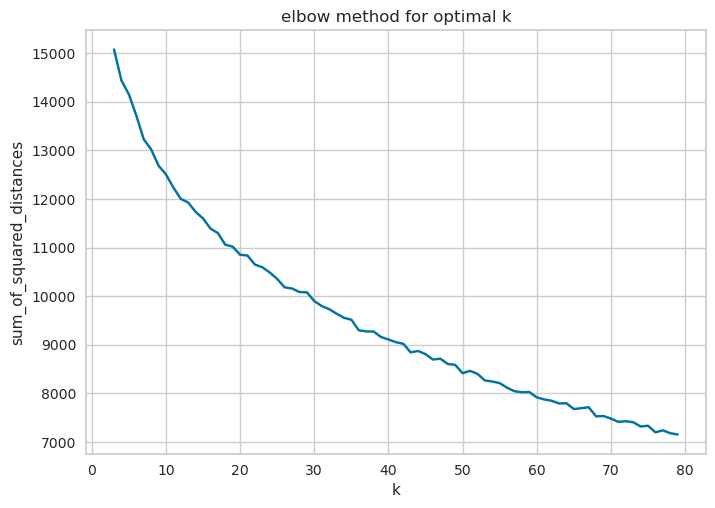

In [ ]:
# Plot inertia
plt.plot(param_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [ ]:
# Best clustering
#k = opt_val_sil
k = 100
kmeans = KMeans(n_clusters=k)
kmeans.fit(labels_encoded)

KMeans(n_clusters=100)

Graph des Silhouettes



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

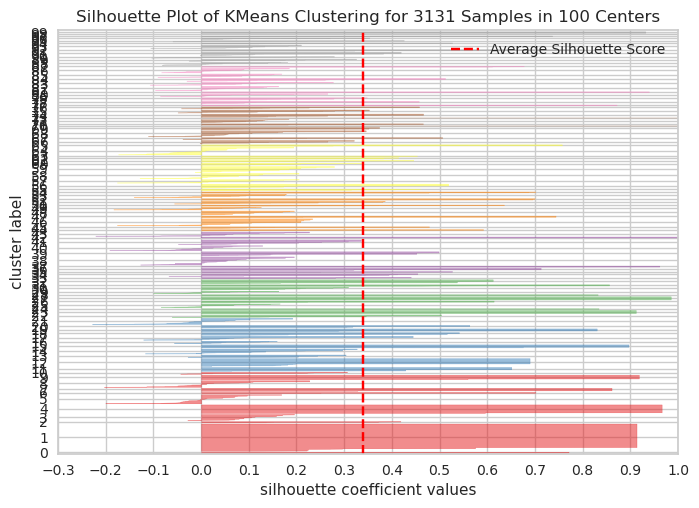

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3131 Samples in 100 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Graph des silhouettes
from yellowbrick.cluster import SilhouetteVisualizer
print("Graph des Silhouettes\n")
silhouette_vis = SilhouetteVisualizer(kmeans)
silhouette_vis.fit(labels_encoded)
silhouette_vis.poof()

In [ ]:
# Plot clusters
# Fit visualisation pipeline
import sklearn
from sklearn.manifold import TSNE
tsne =  TSNE(init="pca").fit_transform(labels_encoded)

: 

: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

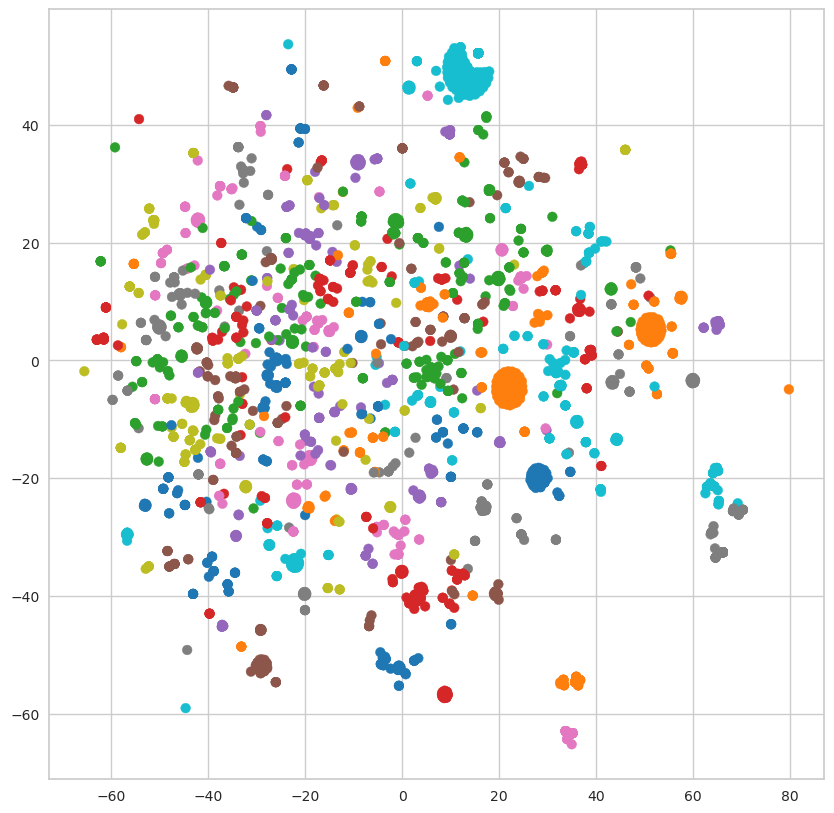

In [ ]:
# Plot TSNE
plt.figure(figsize=(10, 10))
axe = plt.axes()
clusters = kmeans.labels_
num_classes = k
palette = np.array(sns.color_palette("tab10", num_classes))
axe.scatter(x=tsne[:, 0], y=tsne[:, 1], c=palette[clusters.astype(int)])
plt.legend()